<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/008_superstore_Loss_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss and Cost Analysis Summary Analysis

#### Key Findings:
1. **Cost and Profitability Trends**:
   - Losses are persistent across all years, with average profitability ratios consistently in the range of -30% to -40%.
   - Rising costs, such as a 28% increase in estimated costs per order from 2014 to 2016, significantly outpace modest sales growth.

2. **Impact of Discounts**:
   - Discounts are a major driver of losses, with average discounts exceeding 50% across all years. This aggressive pricing strategy erodes profit margins without achieving proportional sales growth.

3. **Losses Across Categories and Regions:**
   - **Furniture**: High costs in products like tables and bookcases drive significant losses. Average losses reach -\$51.76 per order with the highest estimated costs (\$241.10).
   - **Office Supplies**: Losses amplified by aggressive discounting, especially in sub-categories like binders and appliances. Discounts average 0.64, leading to steep profitability declines.
   - **Technology**: Lowest average losses (-$27.24) with relatively controlled discounts (0.31). Moderate costs (\$151.70) offer room for optimized growth.

4. **Regional Insights:**
   - **Central Region**: Leads in losses due to heavy discounting (0.59 average) and inefficiencies in high-cost states like Texas and Illinois.
   - **East Region**: Faces cost inefficiencies, with Pennsylvania and Ohio showing high estimated costs but moderate losses.
   - **South Region**: The most cost-efficient but still affected by high discounts (0.52) in Florida and Tennessee.
   - **West Region**: High variability in costs and losses, with California balancing costs and profitability while Oregon and Arizona lag behind.

5. **Sub-Category Focus:**
   - **Furniture Tables and Bookcases**: Consistently rank among top loss drivers across regions due to elevated costs.
   - **Office Supplies Appliances**: Heavy discounts (0.8 average) erode profitability.
   - **Technology Machines**: Costs and discounts combine to drive losses; requires vendor renegotiations.

6. **Operational Metrics:**
   - Discounts are a recurring challenge, consistently exceeding 0.5 across categories.
   - High variability in costs suggests inefficiencies in supply chain and procurement processes.


#### Strategic Recommendations:
1. **Cost Reduction**:
   - Focus on renegotiating vendor contracts and streamlining supply chains in high-cost states (e.g., Texas, Pennsylvania) and categories (e.g., Furniture).
   - Address inefficiencies in regions with high cost variability, such as the Central and West.

2. **Discount Optimization**:
   - Reduce discounts in categories and regions where they are disproportionately high (e.g., Central Region, Office Supplies).
   - Align discounts with high-margin products and use them strategically to boost profitability rather than indiscriminate sales volume.

3. **Focus on High-Impact Areas**:
   - **Regions**: Target cost and discount improvements in the Central and East regions, which show the largest opportunities for improvement.
   - **Categories**: Address operational inefficiencies in Furniture and reduce discounting in Office Supplies.
   - **States**: Prioritize action in high-cost, high-loss states like Texas, Illinois, and Pennsylvania.

4. **Replicate Successful Models**:
   - Learn from the South Region, which demonstrates efficient cost control and lower losses.
   - Study California and Washington’s balanced cost and profitability approach to apply best practices in other regions.



### Load & Process Data

Dataset loaded successfully.
Removed 4985 duplicate rows.
Column: Sales
Lower Fence: -259.31, Upper Fence: 475.57
Original Dataset: 5009 rows
Non-Outliers: 4399 rows (87.82%)
Outliers: 610 rows (12.18%)


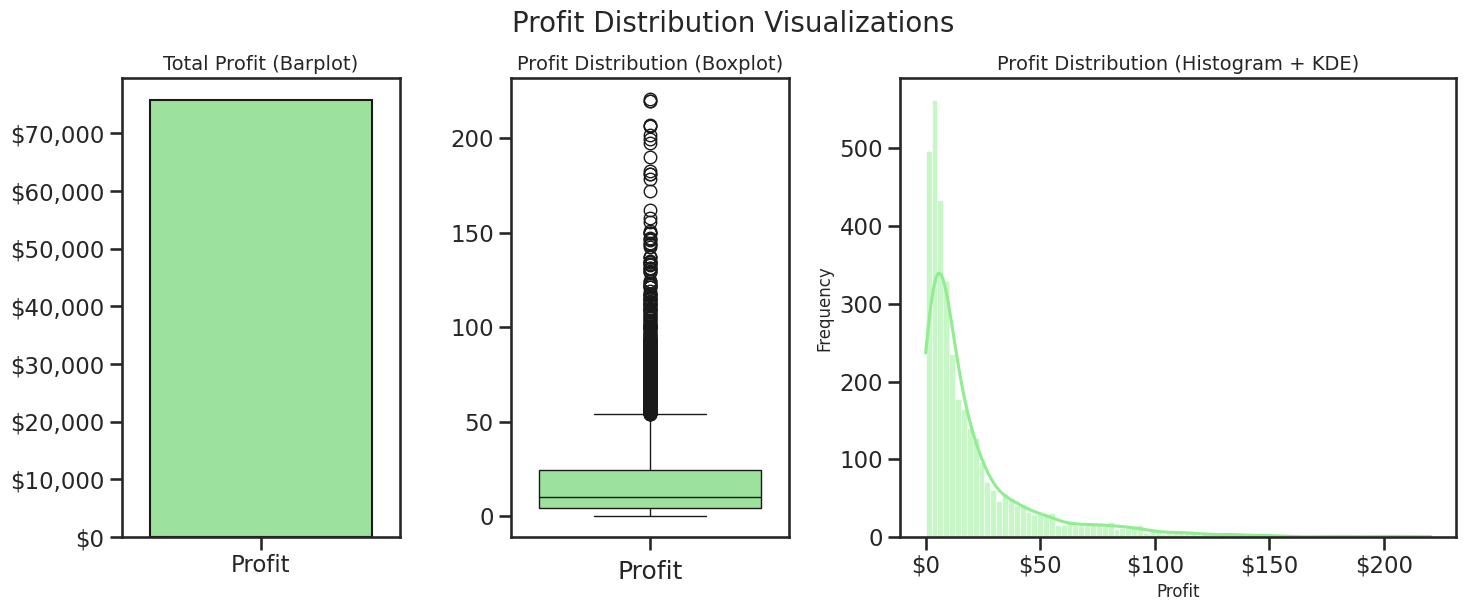

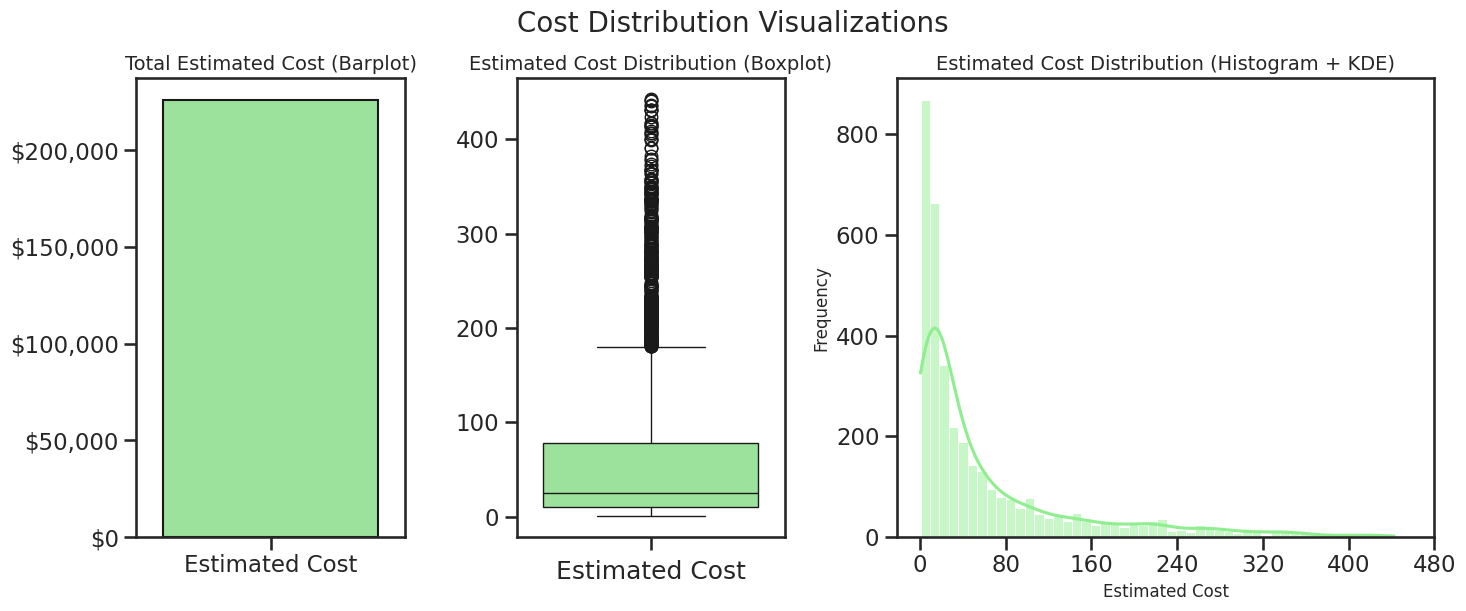

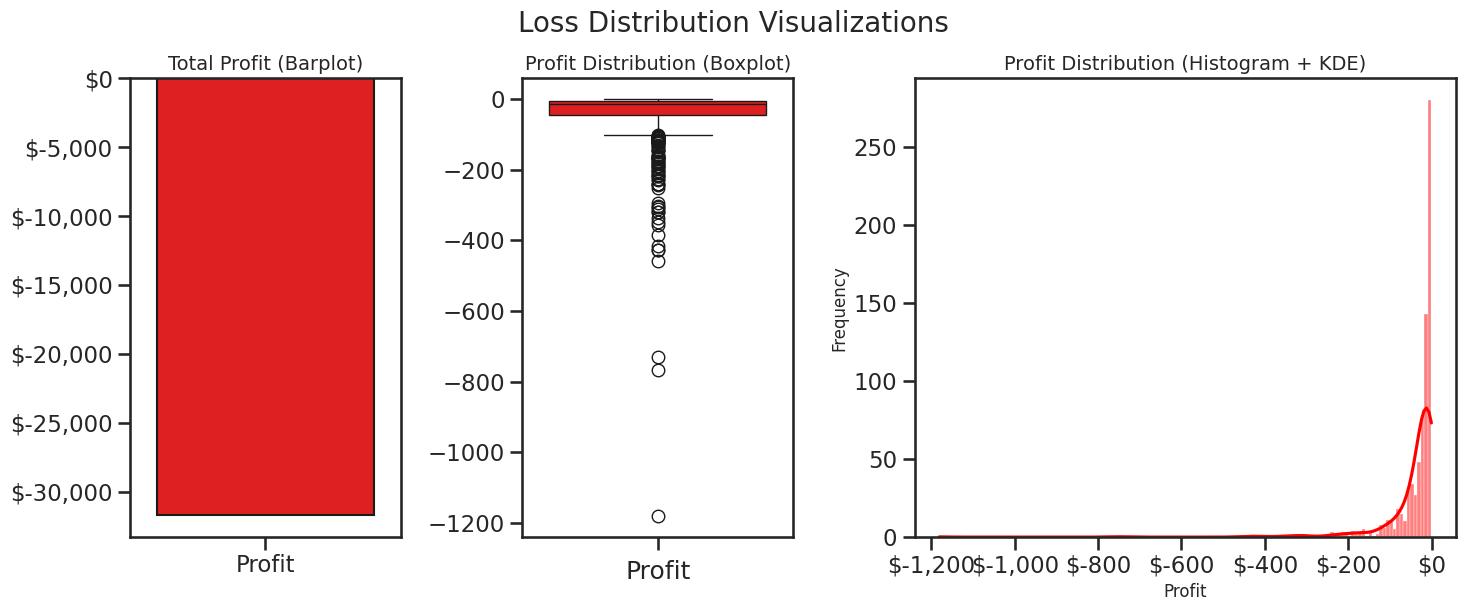

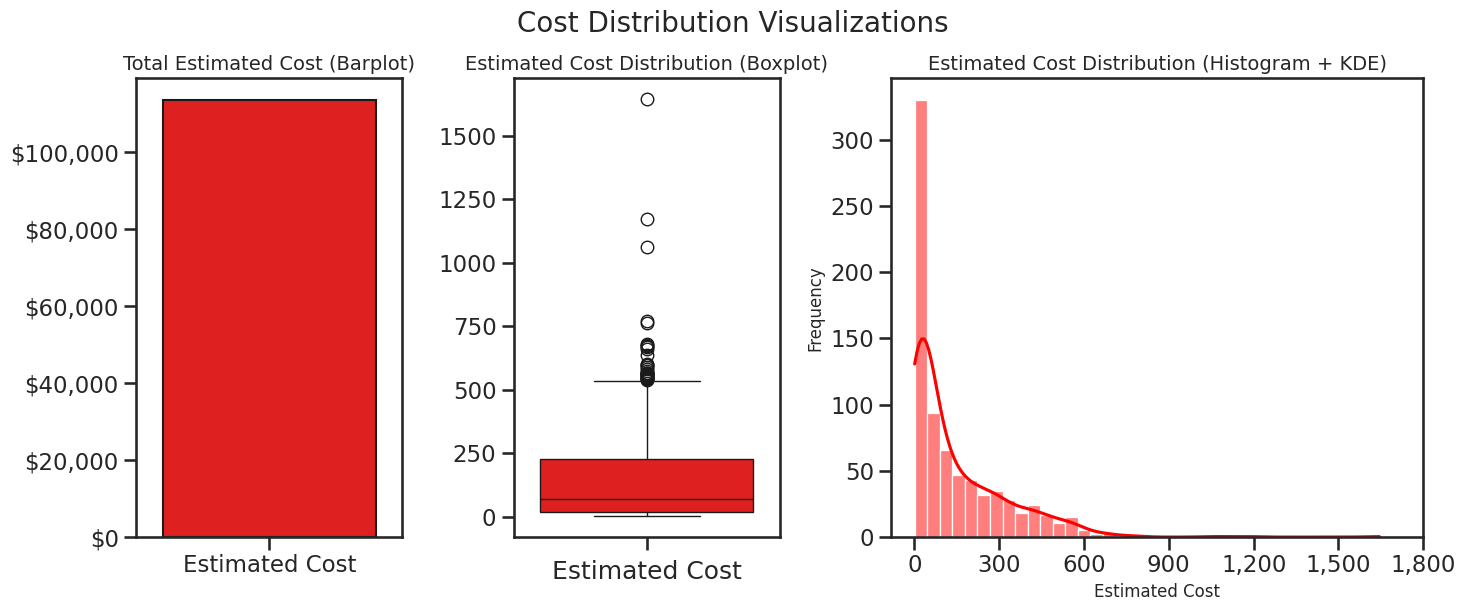

In [3]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Sub-Category', 'Quantity', 'Estimated Cost', 'Average Discount',
                   'Discount', 'Total Quantity', 'Profit Margin', 'Regional Market Share (%)', 'Profit per Category', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Step 7: Remove outliers in the 'Sales' column using Tukey's Fences
filtered_data, outliers = dpu.remove_outliers_tukey(data, column='Sales', plot=False)

# Group 1: Data with losses (Profit < 0)
data_losses = filtered_data[filtered_data['Profit'] < 0]
# Group 2: Data with profits (Profit >= 0)
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# plot the profit and cost data
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')
dvu.plot_sales_distribution_2(data_profits, column='Estimated Cost', title='Cost Distribution Visualizations', color='lightgreen', round_decimals=0)

# plot the loss and discountdata
dvu.plot_sales_distribution(data_losses , column='Profit', title='Loss Distribution Visualizations', color='red')
dvu.plot_sales_distribution_2(data_losses , column='Estimated Cost', title='Cost Distribution Visualizations', color='red', round_decimals=0)


### Splitting Data into Profits and Losses Rationale

Analyzing profits and losses separately is a strategic approach to uncover the underlying causes of financial performance and inform actionable decisions. Here’s why this methodology makes sense:

1. **Targeted Analysis of Losses:** By isolating data with losses, the analysis can focus specifically on identifying patterns and drivers behind negative profitability, such as high discounts, excessive costs, or inefficient operations, without being diluted by profitable transactions.

2. **Distinct Characteristics:** Profitable and loss-making transactions often have fundamentally different attributes (e.g., discount levels, cost structures). Separating these datasets ensures that trends and anomalies unique to each group are not obscured in aggregated analysis.

3. **Actionable Insights:** Understanding what differentiates loss-making transactions from profitable ones allows for precise interventions, such as adjusting pricing strategies, optimizing cost controls, or targeting high-loss segments.

4. **Visualization and Clarity:** Plotting profits and losses independently makes it easier to visualize their distinct distributions, such as the broader range of costs and higher discount levels in loss-making data, leading to clearer storytelling and better stakeholder communication.

5. **Improved Decision-Making:** This approach ensures that decisions are data-driven and context-specific, helping to minimize losses while reinforcing strategies that maximize profitability.

# Loss & Cost Summary Statistics

Figure saved as /content/loss_cost_sumamry_stats.png


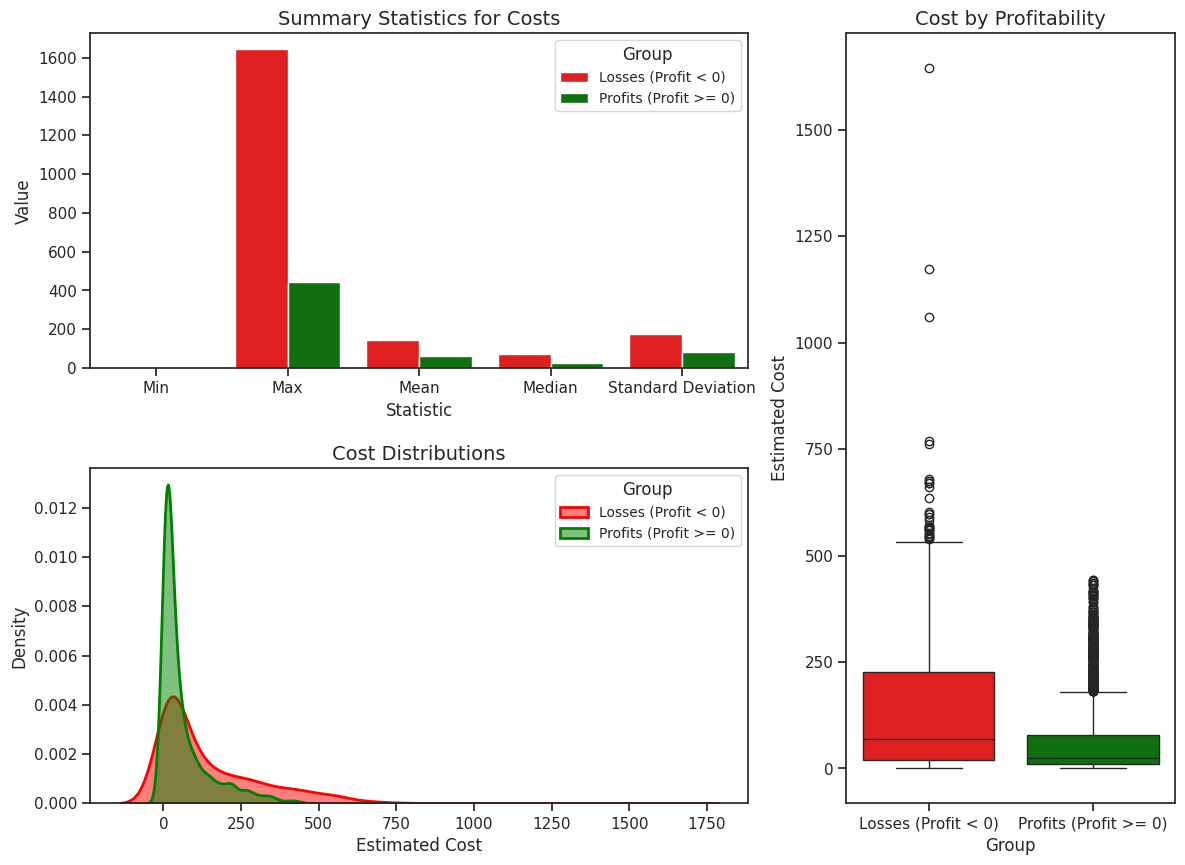

In [4]:
# Calculate stats for both groups
cost_stats_losses = dvu.calculate_discount_stats(data_losses, column='Estimated Cost')
cost_stats_profits = dvu.calculate_discount_stats(data_profits, column='Estimated Cost')

# Combine the stats into a single DataFrame
cost_summary_table = pd.DataFrame({
    'Statistic': cost_stats_losses.keys(),
    'Losses (Profit < 0)': cost_stats_losses.values(),
    'Profits (Profit >= 0)': cost_stats_profits.values()
})

# Visualize the metrics and save the figure
save_path = "/content/loss_cost_sumamry_stats.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Call the function
dvu.plot_discount_analysis_grid(data_losses, data_profits, cost_summary_table, column='Estimated Cost')

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Profit and Lost Cost Distribution Analysis

1. **Average Cost Contrast**:
   - Losses: The **average cost** is **\$146.36**, more than double the average cost for profitable transactions, signaling that higher costs are a major driver of losses.
   - Profits: The **average cost** is **\$62.35**, reflecting more efficient spending.

2. **Cost Range Disparity**:
   - Losses: Costs range from **\$1.45** to **\$1,644.53**, indicating that many loss-making transactions are associated with extremely high costs.
   - Profits: Costs range from **\$0.55** to **\$442.43**, suggesting a narrower and more controlled range for profitable transactions.

3. **Central Tendency (Median)**:
   - Losses: The **median cost** is **\$70.32**, with many transactions showing costs significantly above this midpoint.
   - Profits: The **median cost** is **\$25.21**, indicating that the majority of profitable transactions involve much lower costs.

4. **Variation in Costs (Spread)**:
   - Losses: The **standard deviation** of costs is **\$177.41**, showing a much wider variability in costs, which could reflect inconsistent cost control.
   - Profits: The **standard deviation** of costs is **\$82.78**, indicating tighter and more predictable cost patterns.



In [32]:
# data_losses[['Profit', 'Estimated Cost']].describe()
# data_profits[['Profit', 'Estimated Cost']].describe()

# Generate descriptive statistics for losses and profits
losses_stats = data_losses[['Profit', 'Estimated Cost']].describe().transpose()
profits_stats = data_profits[['Profit', 'Estimated Cost']].describe().transpose()

# Add a column to indicate whether the stats are for losses or profits
losses_stats['Category'] = 'Losses'
profits_stats['Category'] = 'Profits'

# Combine the two tables into a single DataFrame
combined_stats = pd.concat([losses_stats, profits_stats])

# Move the 'Category' column to the front for clarity
combined_stats = combined_stats.reset_index().rename(columns={'index': 'Metric'})
combined_stats = combined_stats[['Category', 'Metric'] + [col for col in combined_stats.columns if col not in ['Category', 'Metric']]]

# Display the combined table
combined_stats


,Category,Metric,count,mean,std,min,25%,50%,75%,max
0,Losses,Profit,776.0,-40.877741,82.413352,-1181.2824,-44.18550,-14.3856,-5.698125,-0.2685
1,Losses,Estimated Cost,776.0,146.359383,177.410443,1.4484,18.88275,70.3242,225.663900,1644.5304
2,Profits,Profit,3623.0,20.916086,28.072311,0.0000,4.32810,10.0485,24.222300,220.4853
3,Profits,Estimated Cost,3623.0,62.350696,82.777655,0.5544,9.98840,25.2120,78.045600,442.4250


In [5]:
# Display the summary table
cost_summary_table

,Statistic,Losses (Profit < 0),Profits (Profit >= 0)
0,Min,1.448400,0.554400
1,Max,1644.530400,442.425000
2,Mean,146.359383,62.350696
3,Median,70.324200,25.212000
4,Standard Deviation,177.410443,82.777655


### Loss & Costs Summary Statistics Analysis

1. **Key Comparisons**:
   - **Mean Cost**: Loss-making transactions have a **mean cost (146.36)** more than double that of profitable ones (62.35), indicating inefficiency and potential overinvestment in unprofitable areas.
   - **Median Cost**: Losses show a **median cost (70.32)** nearly three times higher than profits (25.21), reinforcing the disparity.
   - **Maximum Cost**: Costs for losses peak at **1,644.53**, far exceeding the **442.42** maximum for profits, highlighting extreme outliers driving inefficiency.

2. **Variability**:
   - Losses exhibit significantly higher **standard deviation (177.41)** in costs compared to profits (82.78), suggesting inconsistent cost management in loss-making transactions.

3. **Actionable Insights**:
   - Focus on controlling high-cost outliers to minimize their impact on overall losses.
   - Investigate loss-making transactions with excessively high costs to identify operational inefficiencies or misaligned spending.

# Loss & Costs by Year

In [17]:
df = data_losses.copy()

# Use the aggregate function to calculate metrics for each group
table_profits = dpu.calculate_aggregate_metrics(df, group_by_columns=['Order Year'])
table_profits

,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,-5094.7210,-77.652874,-36.527573,16819.9770,11725.2560,0.534420,982,468,24.668116
1,2015,-6355.1013,-72.897417,-34.182110,22368.9241,16013.8228,0.523032,1150,559,24.755537
2,2016,-8898.9544,-64.173640,-32.491276,33886.3454,24987.3910,0.503796,1642,788,24.947869
3,2017,-11372.3503,-72.395193,-33.967952,40499.6347,29127.2844,0.508352,1959,970,25.030467



Summary Table for Profits by Year:
Figure saved as /content/profit_by_year.png


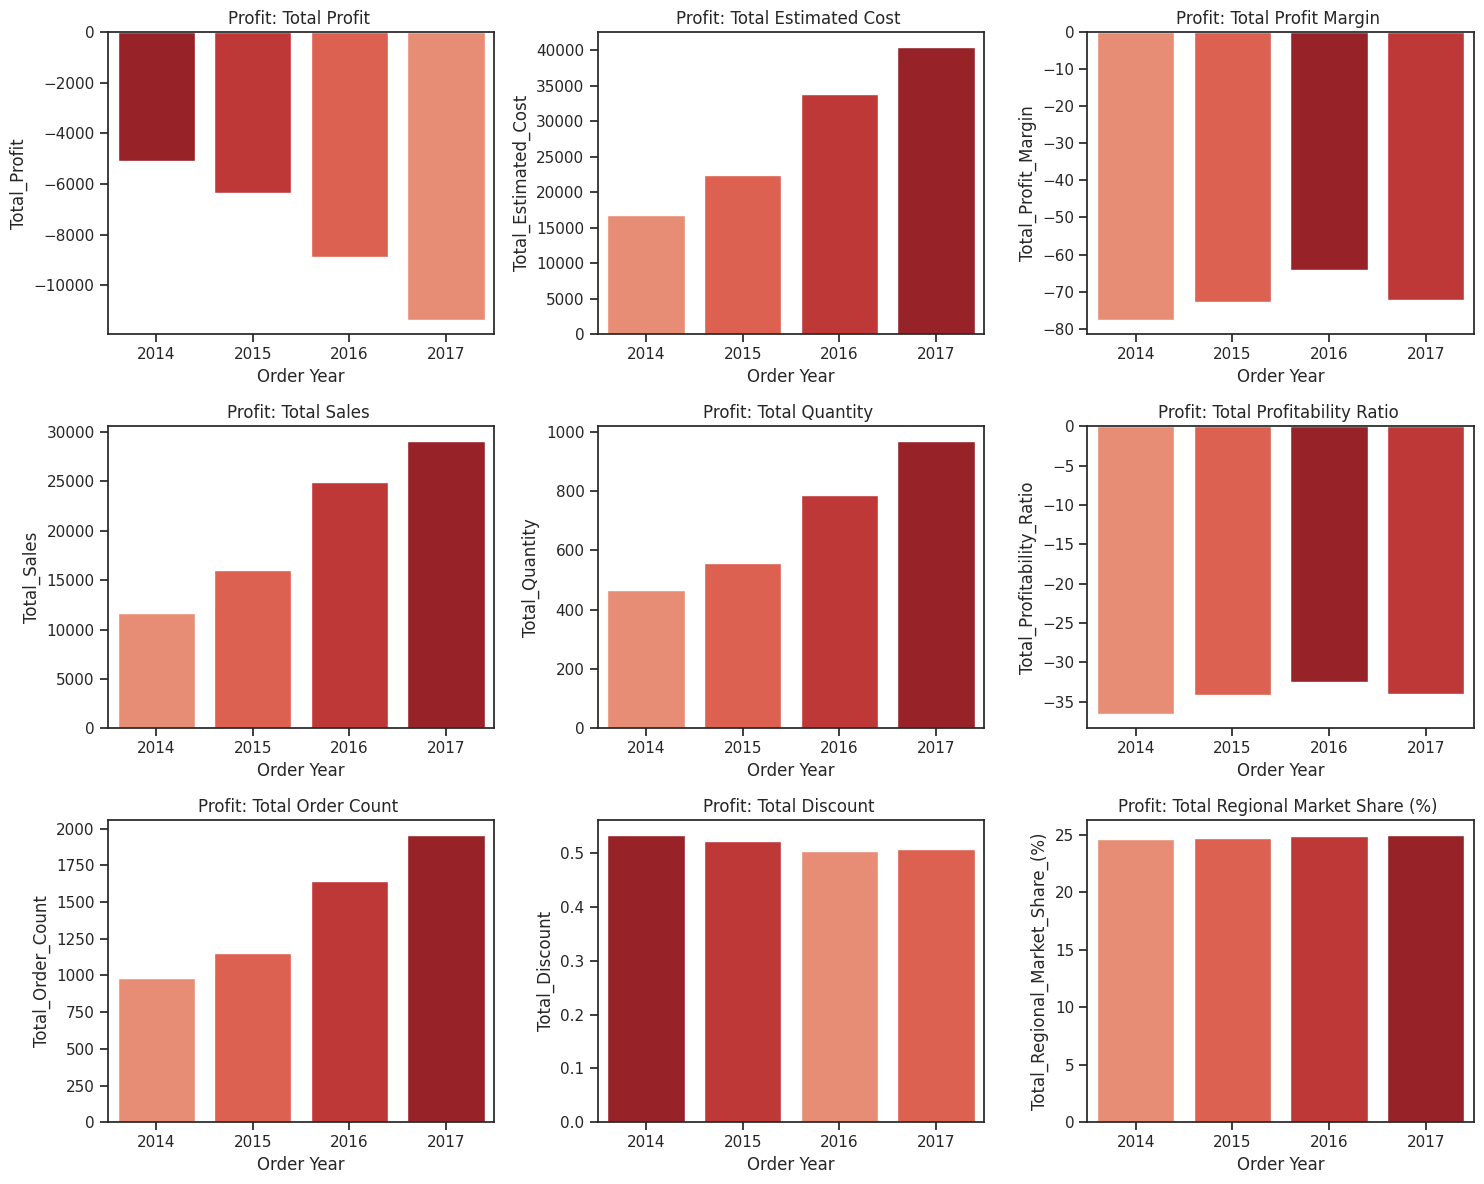

In [21]:
# Display the results
print("\nSummary Table for Profits by Year:")
table_profits# Define metrics for visualization
metrics = [
    'Total_Profit',
    'Total_Estimated_Cost',
    'Total_Profit_Margin',
    'Total_Sales',
    'Total_Quantity',
    'Total_Profitability_Ratio',
    'Total_Order_Count',
    'Total_Discount',
    'Total_Regional_Market_Share_(%)'
]

# Visualize the metrics and save the figure
save_path = "/content/profit_by_year.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker greens for cost analysis
loss_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics
dvu.plot_metrics_grid(
    data1=table_profits,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Loss & Cost by Year Analysis

1. **Increasing Losses Over Time:** Losses have grown consistently from \$5,094 in 2014 to \$11,372 in 2017, indicating worsening financial performance in loss-making areas. This trend requires immediate action to identify and address key loss drivers.

2. **Rising Costs and Sales Misalignment:** Estimated costs have surged from \$16,819 in 2014 to \$40,499 in 2017, outpacing sales growth, which increased from \$11,725 to $29,127. This imbalance suggests inefficiencies in operations or pricing strategies that need to be reviewed.

3. **Consistently High Discounts:** Discount levels remain significant across all years, averaging around 0.50. Discounts may be a major contributor to the losses, particularly if they are not generating sufficient sales volume to offset reduced profit margins.

4. **Order and Quantity Growth Without Profitability:** While order counts and quantities have increased, they have not translated into profitability. This highlights the need to evaluate product-level performance and pricing strategies.

5. **Stable Market Share:** Despite the losses, the regional market share has remained steady at approximately 24-25%, indicating that market position is not the primary issue. Efforts should focus on cost control and optimizing pricing to convert market presence into profitability.

**Actionable Focus Areas:**
- Review and adjust discounting strategies to balance sales volume and profitability.
- Investigate high-cost items or categories and explore cost-reduction measures.
- Prioritize loss-making products or regions for targeted interventions.
- Conduct a detailed profitability analysis for key customer segments and order types.

In [25]:
# Define metrics for visualization
metrics = [
    'Profit',
    'Estimated Cost',
    'Profit Margin',
    'Sales',
    'Quantity',
    'Profitability Ratio',
    'Order Count',
    'Discount',
    'Regional Market Share (%)'
]
# Generate the summary table
summary_table = dvu.summarize_metrics_by_group(df, metrics, group_column='Order Year')

# Display the results
print("\nSummary Table by Year:")
summary_table


Summary Table by Year:


,Summary_Stats,Order Year,Profit,Estimated Cost,Profit Margin,Sales,Quantity,Profitability Ratio,Order Count,Discount,Regional Market Share (%)
0,Mean,2014,-36.918268,121.883891,-77.652874,84.965623,3.391304,-36.527573,7.115942,0.534420,24.668116
1,Median,2014,-13.677250,48.349200,-67.333333,25.984000,3.000000,-40.238095,7.000000,0.600000,21.819594
2,Mode,2014,-7.476000,16.020000,-70.000000,2.502000,3.000000,-43.396226,6.000000,0.800000,21.819594
3,Standard Deviation,2014,62.998020,155.690548,67.543025,113.464526,1.968492,20.237477,2.380187,0.235979,4.854456
4,Mean,2015,-41.000654,144.315639,-72.897417,103.314986,3.606452,-34.182110,7.419355,0.523032,24.755537
5,Median,2015,-12.916800,57.681000,-68.000000,35.360000,3.000000,-40.476190,8.000000,0.600000,21.819594
6,Mode,2015,-100.920000,5.008200,-70.000000,2.946000,2.000000,-42.307692,5.000000,0.700000,21.819594
7,Standard Deviation,2015,104.189823,194.292838,68.525966,128.177778,2.172726,21.594246,2.635598,0.241380,5.063042
8,Mean,2016,-41.198863,156.881229,-64.173640,115.682366,3.648148,-32.491276,7.601852,0.503796,24.947869
9,Median,2016,-16.178200,82.386400,-50.000000,61.539000,3.000000,-33.333333,7.000000,0.600000,21.819594


### Loss by Year Plots

Figure saved as /content/loss_year.png


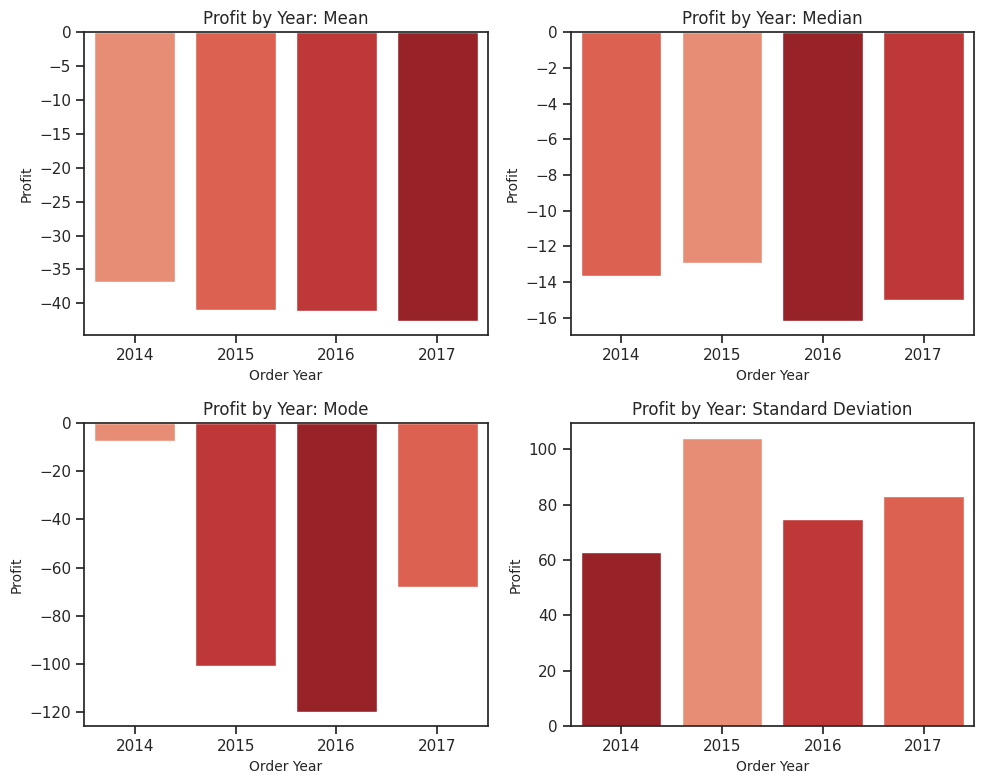

In [26]:
# Define the summary statistics to plot
summary_stats = ['Mean', 'Median', 'Mode', 'Standard Deviation']

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker blues for cost analysis
loss_palette = sns.color_palette("Reds_r", n_colors=6)[:4]  # Select the darker shades

# Visualize the metrics and save the figure
save_path = "/content/loss_year.png"

# Call the function to plot the grid for profits
dvu.plot_summary_stats_grid(
    data=summary_table,
    metric='Profit',
    group_by_column='Order Year',
    stats=summary_stats,
    title_prefix="Profit by Year: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Cost by Year Plots

Figure saved as /content/cost_year.png


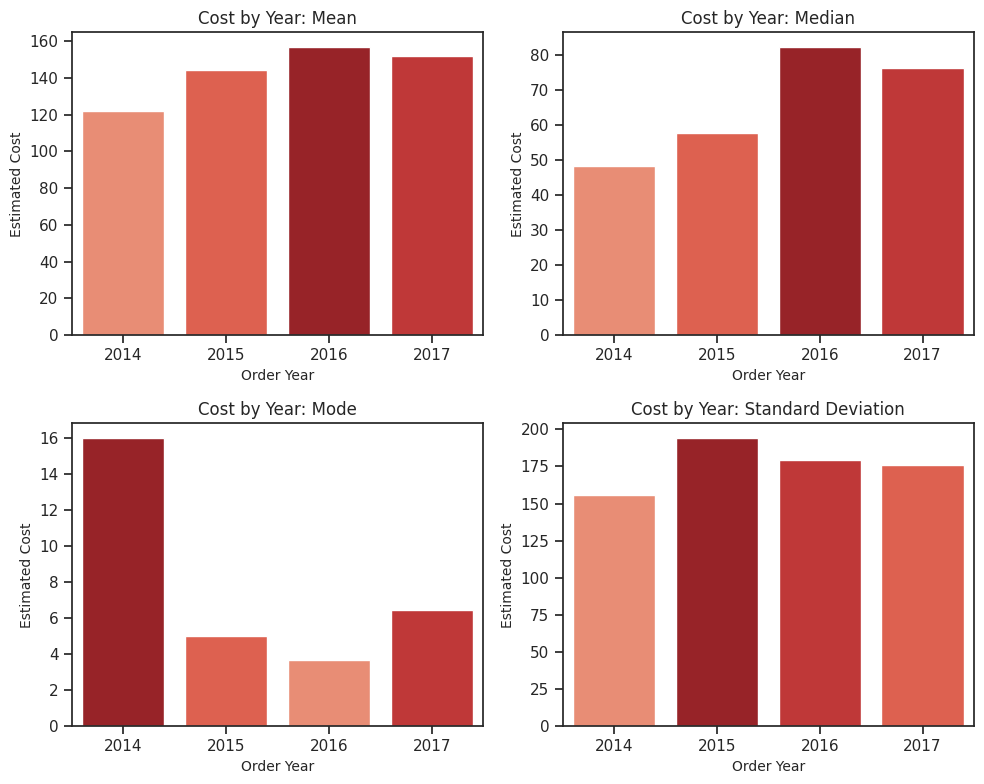

In [8]:
# Define a subset of darker blues for cost analysis
cost_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Visualize the metrics and save the figure
save_path = "/content/cost_year.png"

# Call the function to plot the grid for costs
dvu.plot_summary_stats_grid(
    data=summary_table,
    metric='Estimated Cost',
    group_by_column='Order Year',
    stats=summary_stats,
    title_prefix="Cost by Year: ",
    palette=cost_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### Losses and Costs by Year Analysis

#### **Profitability Trends**
1. **Consistent Losses Across All Years**:
   - Average yearly profits are negative, with the mean losses ranging from **-\$36.92** in 2014 to **-\$42.59** in 2017, showing a gradual increase in the severity of losses.
   - The **standard deviation** of profits is high (e.g., **$104.19 in 2015**) indicating significant variability in losses across orders.

2. **Profitability Ratios**:
   - Profitability ratios consistently hover in the **-30% to -40% range**, indicating an unsustainable model where costs significantly outweigh revenues.
   - The **Profit Margin** shows similar trends, ranging from **-64.17%** in 2016 to **-77.65%** in 2014, emphasizing the need for cost containment strategies.

#### **Cost Implications**
1. **Rising Costs**:
   - The **Estimated Cost per order** increased from **\$121.88** in 2014 to **\$156.88** in 2016, representing a 28% rise over three years. This aligns with increased losses and declining profitability ratios.
   - Variability in costs (e.g., **$194.29 in 2015**) suggests inefficiencies in procurement or operations that need closer scrutiny.

2. **Sales Performance**:
   - Mean **Sales per order** increased modestly from **\$84.97** in 2014 to **$115.68** in 2016, but this improvement is overshadowed by rising costs, preventing profitability gains.

#### **Operational Metrics**
1. **Discounts**:
   - Discounts remained consistently high across all years (mean: **0.50–0.53**) and may be contributing to shrinking profit margins. This suggests that discount strategies are eroding revenue without significantly boosting sales volumes.

2. **Order Count and Quantity**:
   - Order volume remained relatively stable, averaging around **7 orders per year per sub-category**, but higher quantities per order (**3–4 units**) may contribute to rising logistics or inventory costs.

#### **Regional Market Share**
- The **Regional Market Share** remained flat at **21–25%**, indicating no substantial growth or decline in market dominance.

---

### **Recommendations**
1. **Cost Management**:
   - Investigate and streamline high-cost categories to control rising operational expenses.
   - Introduce stricter procurement policies or supplier audits to minimize variability in costs.

2. **Profitability Improvement**:
   - Reevaluate discount policies to ensure they drive sales effectively without undercutting profits.
   - Focus on high-margin products and reduce emphasis on loss-leading categories.

3. **Strategic Adjustments**:
   - Analyze the correlation between sales, discounts, and costs by category and region to identify areas of inefficiency.
   - Develop strategies to optimize inventory and logistics to reduce per-unit costs.







# Region

In [ ]:
# Generate the summary table grouped by region
summary_table_region = dvu.summarize_metrics_by_group(data=df, metrics=metrics, group_column='Region')
summary_table_region

,Summary_Stats,Region,Profit,Profit Margin,Profitability Ratio,Estimated Cost,Sales,Discount,Order Count,Quantity,Regional Market Share (%)
0,Mean,Central,-49.778810,-108.814011,-43.695413,128.379277,78.600467,0.594506,7.308642,3.780864,2.181959e+01
1,Median,Central,-15.052350,-118.750000,-54.284222,47.789100,24.914000,0.600000,7.000000,3.000000,2.181959e+01
2,Mode,Central,-110.023200,-150.000000,-61.538462,5.204600,1.248000,0.800000,8.000000,3.000000,2.181959e+01
3,Standard Deviation,Central,110.927237,80.902234,22.856140,188.232625,107.600035,0.234822,2.590251,2.125651,1.352119e-13
4,Mean,East,-36.747223,-42.716919,-26.974108,168.889932,132.142709,0.468182,7.427273,3.222727,2.954819e+01
5,Median,East,-15.232300,-27.738095,-21.713118,101.835600,71.046000,0.400000,7.000000,3.000000,2.954819e+01
6,Mode,East,-120.050800,-70.000000,-41.176471,17.908800,2.502000,0.700000,9.000000,2.000000,2.954819e+01
7,Standard Deviation,East,50.723089,29.017088,14.730088,174.525737,136.715499,0.200653,2.528230,2.006936,8.545958e-14
8,Mean,South,-25.398432,-51.456492,-31.323555,109.625065,84.226633,0.518349,7.211009,3.642202,1.705214e+01
9,Median,South,-9.153000,-66.666667,-40.000000,31.680000,22.911000,0.700000,7.000000,3.000000,1.705214e+01


Figure saved as /content/loss_region_year.png


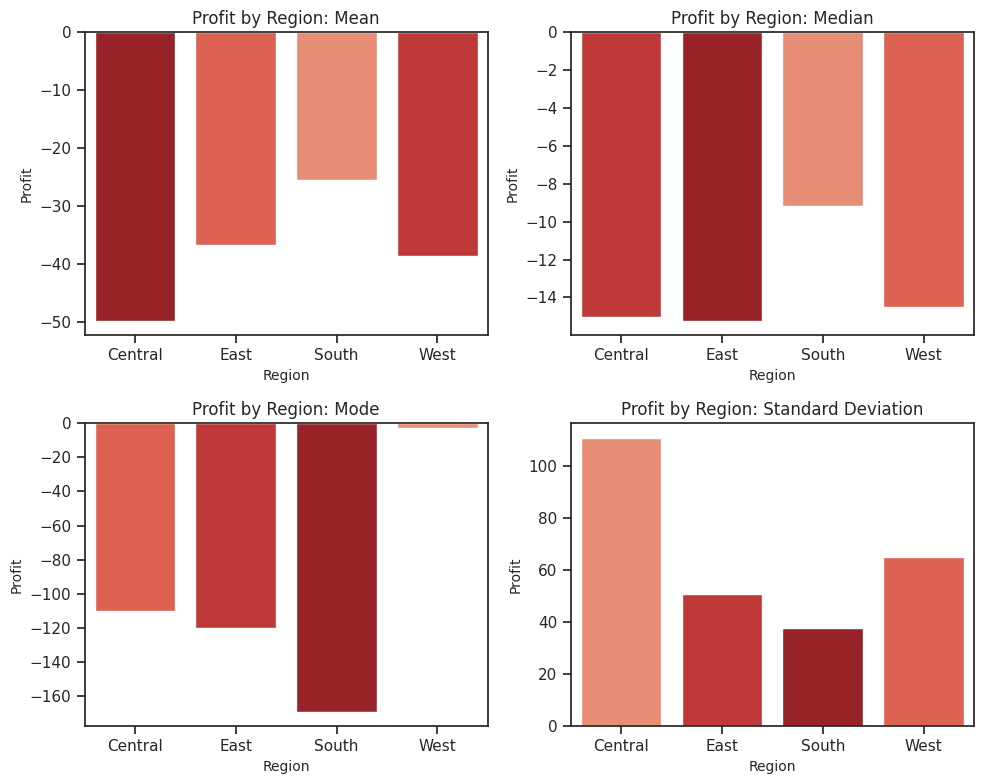

In [ ]:
# Visualize the metrics and save the figure
save_path = "/content/loss_region_year.png"

# Define a subset of darker blues for cost analysis
loss_palette = sns.color_palette("Reds_r", n_colors=6)[:4]  # Select the darker shades

# Call the function to plot the grid for discounts
dvu.plot_summary_stats_grid(
    data=summary_table_region,
    metric='Profit',
    group_by_column='Region',
    stats=summary_stats,
    title_prefix="Profit by Region: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Regional Loss and Cost Analysis

#### **Overview**
The analysis highlights significant differences in losses, costs, and operational efficiency across regions. The **Central** and **West** regions exhibit higher variability in losses and costs, while the **East** and **South** regions have relatively more stable metrics but still face notable challenges.

---

### **Regional Highlights**

#### **Central Region**
- **Losses**: Mean losses are **-\$49.78**, the highest among all regions, with substantial variability (**±\$110.93**) indicating inconsistent performance.
- **Costs**: Average estimated costs per order are **$128.38**, higher than the **South** and **East**, suggesting inefficiencies in operations.
- **Discounts**: Discounts average **0.59**, higher than any other region, likely contributing to the deep losses. A reduction in discounts could significantly mitigate losses.

#### **East Region**
- **Losses**: Average losses are **-\$36.75**, with lower variability (**±\$50.72**) compared to other regions.
- **Costs**: Estimated costs are **$168.89**, the highest among all regions, despite the lowest average discounts (**0.47**). This indicates cost inefficiencies may be driving losses here rather than aggressive discounting.
- **Profitability Ratios**: At **-26.97%**, the East region's profitability ratio is less severe compared to other regions but still concerning.

#### **South Region**
- **Losses**: With the lowest mean losses at **-25.40**, the South shows better loss control compared to other regions.
- **Costs**: Estimated costs are **$109.63**, the lowest among all regions, suggesting relatively efficient operations.
- **Discounts**: At **0.52**, discounts are moderate but still require optimization to improve profitability ratios (**-31.32%**).

#### **West Region**
- **Losses**: Average losses are **-\$38.54**, slightly higher than the **South** but lower than the **Central** and **East** regions.
- **Costs**: Estimated costs are **$185.98**, the second-highest among all regions, driven by high variability in order costs (**±\$167.14**).
- **Discounts**: Discounts are the lowest at **0.38**, yet losses remain substantial, pointing to cost inefficiencies as the primary driver of poor profitability.

---

### **Key Takeaways**
1. **Central and West Regions**:
   - High variability in costs and losses calls for stricter operational controls and better cost containment strategies.
   - Central's elevated discounts should be reevaluated to ensure they are driving sustainable sales.

2. **East Region**:
   - The highest costs in the East demand immediate attention to procurement and logistics practices. Discounting is controlled but insufficient to offset high operational costs.

3. **South Region**:
   - The South shows promise with the lowest costs and losses. This region could serve as a model for other regions, focusing on maintaining efficient operations while addressing moderate discounting.

---

### **Recommendations**
1. **Cost Reduction Initiatives**:
   - Investigate high-cost drivers in the East and West regions, particularly procurement and logistics inefficiencies.
   - Leverage the South's cost efficiency model across other regions.

2. **Optimize Discounts**:
   - Reduce discounts in the Central region while ensuring they target high-margin products.

3. **Focus on Consistency**:
   - Address the high variability in costs and losses, particularly in the Central and West regions, to stabilize financial performance.

4. **Targeted Regional Strategies**:
   - Tailor cost and discount strategies to each region’s specific needs, focusing on high-cost areas like the East and West while building on the South’s operational strengths.

By addressing these issues, the company can significantly reduce regional losses and pave the way for improved profitability across the board.




Figure saved as /content/cost_region_year.png


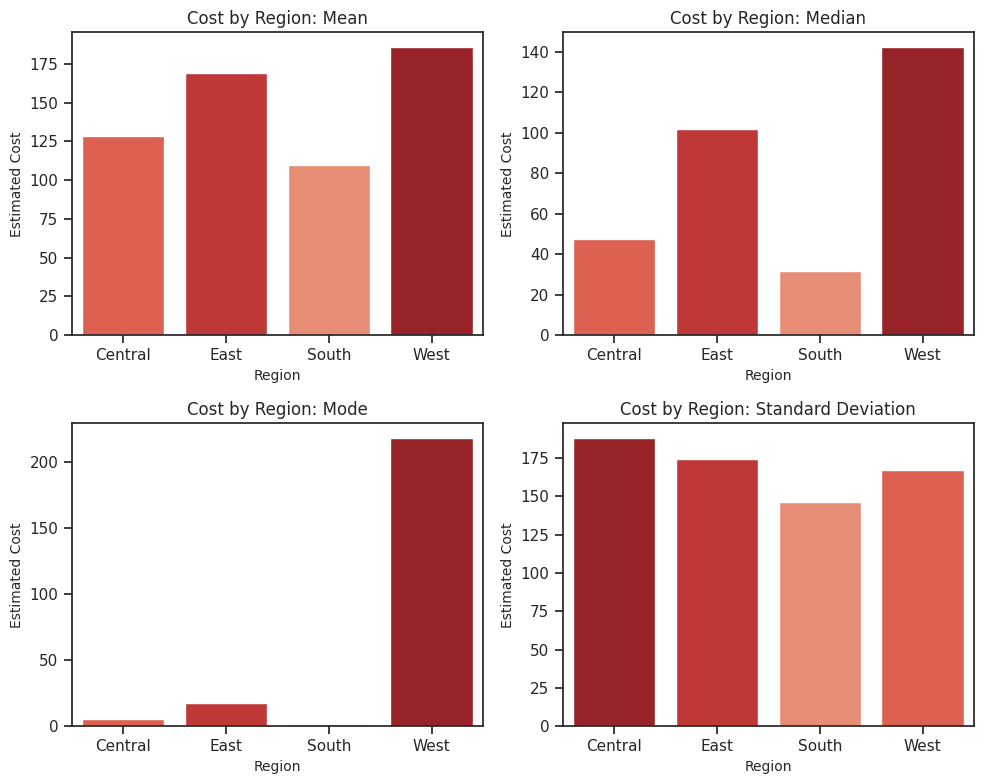

In [ ]:
# Visualize the metrics and save the figure
save_path = "/content/cost_region_year.png"

# Define a subset of darker blues for cost analysis
cost_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Call the function to plot the grid for discounts
dvu.plot_summary_stats_grid(
    data=summary_table_region,
    metric='Estimated Cost',
    group_by_column='Region',
    stats=summary_stats,
    title_prefix="Cost by Region: ",
    palette=cost_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

# Region & State

In [ ]:
# Use the aggregate function to calculate metrics by Region and State
table_region_state = dpu.calculate_aggregate_metrics(df, group_by_columns=['Region', 'State'])

# Sort the data within each region by Total Estimated Cost in descending order
table_region_state_sorted = table_region_state.sort_values(['Region', 'Total_Estimated_Cost'], ascending=[True, False])

# Select the top 5 states per region
top_states_by_region = table_region_state_sorted.groupby('Region', observed=True).head(5).reset_index(drop=True)

# Display the results
print("\nTop 5 States by Total Estimated Cost for Each Region:")
top_states_by_region


Top 5 States by Total Estimated Cost for Each Region:


,Region,State,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,Central,Texas,-9712.3890,-106.161555,-42.157590,24717.9592,15005.5702,0.580600,1438,730,21.819594
1,Central,Illinois,-6415.9455,-113.092166,-46.175773,16876.9265,10460.9810,0.616935,930,495,21.819594
2,East,Pennsylvania,-3951.5718,-42.996523,-27.053993,18133.5668,14181.9950,0.467257,828,355,29.548188
3,East,Ohio,-2832.1161,-47.901120,-29.611469,11820.3921,8988.2760,0.505882,652,300,29.548188
4,East,New York,-1178.9400,-24.223856,-18.281266,5974.3100,4795.3700,0.335294,121,41,29.548188
5,East,New Jersey,-31.3722,-12.857143,-11.392405,275.3782,244.0060,0.300000,7,2,29.548188
6,East,Maryland,-23.9372,-10.000000,-9.090909,263.3092,239.3720,0.300000,4,2,29.548188
7,South,Florida,-1509.9440,-53.356452,-32.377180,6484.8730,4974.9290,0.541379,417,210,17.052140
8,South,Tennessee,-761.0517,-44.967262,-28.069002,3519.3617,2758.3100,0.464286,208,79,17.052140
9,South,North Carolina,-497.4334,-54.565217,-32.628654,1944.8974,1447.4640,0.526087,161,108,17.052140


Figure saved as /content/loss_cost_region_state.png


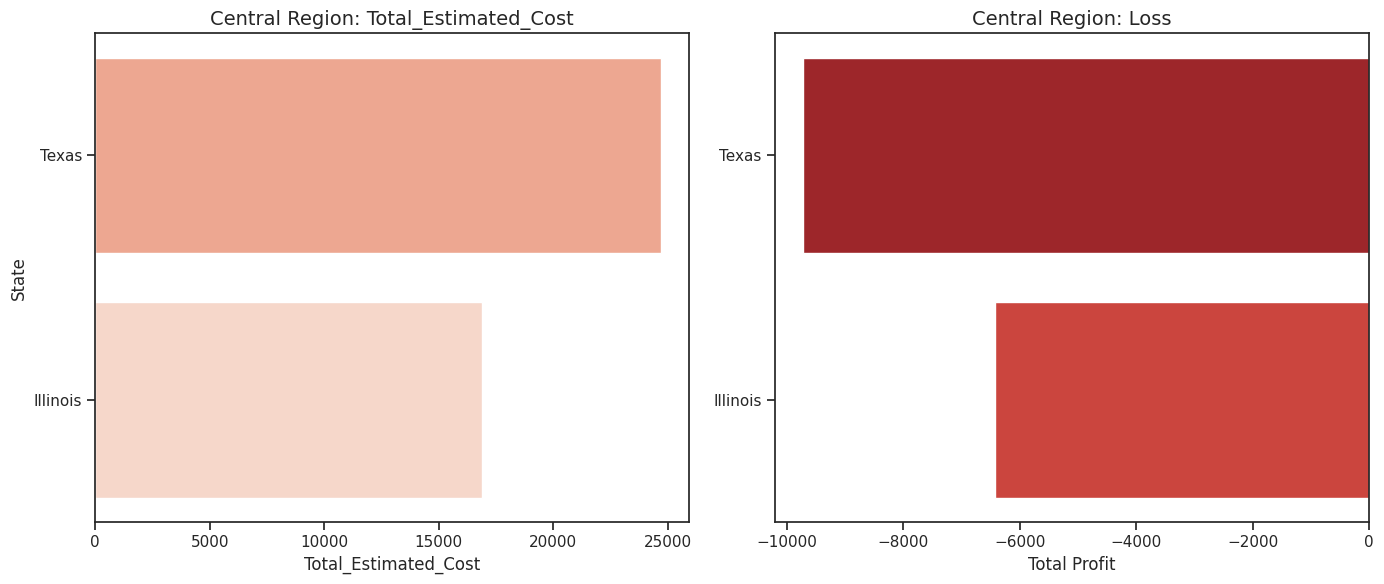

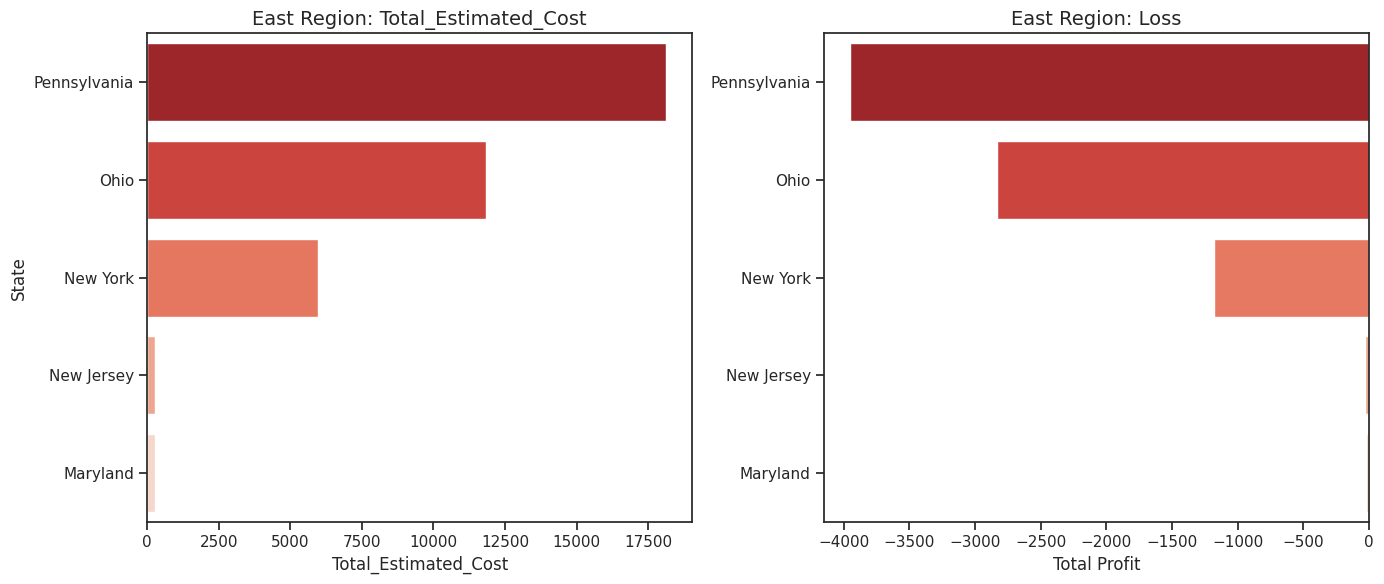

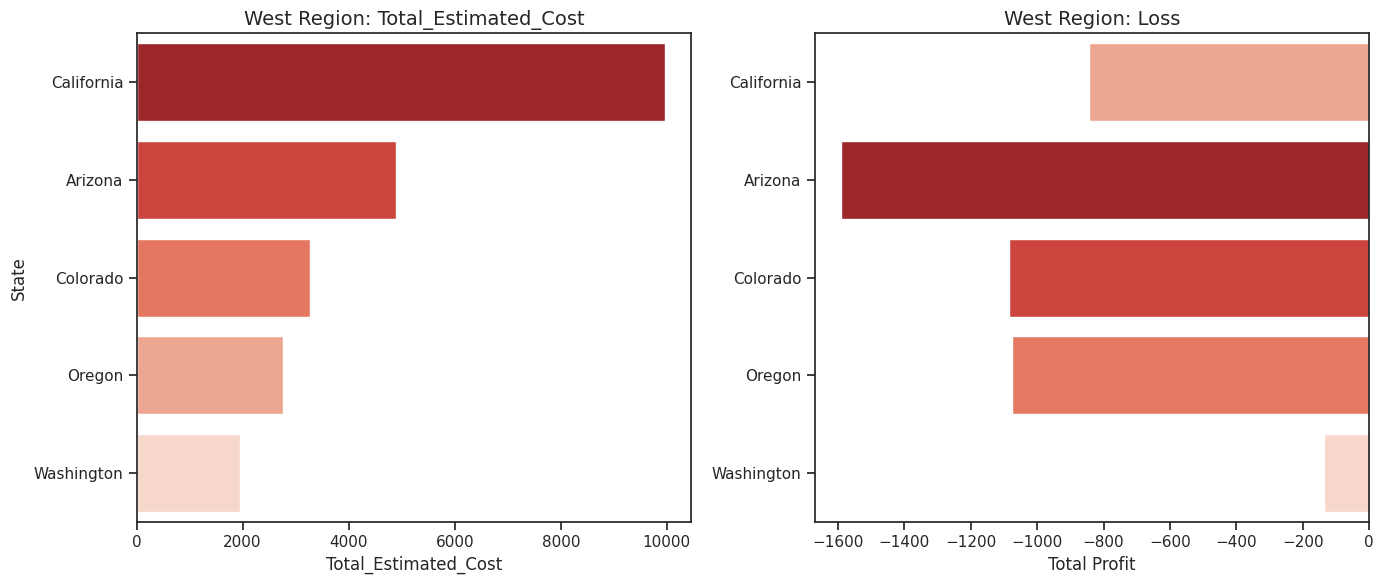

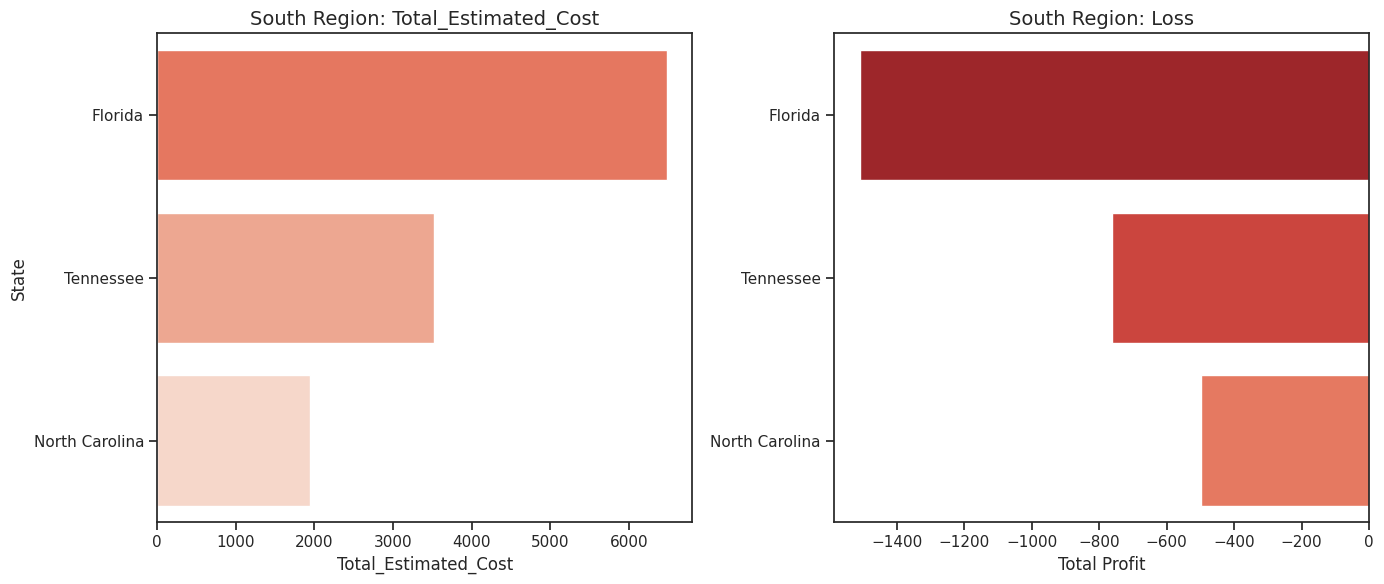

In [ ]:
regions=df["Region"].unique().tolist()

import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Visualize the metrics and save the figure
save_path = "/content/loss_cost_region_state.png"

# Set Seaborn theme
sns.set_theme(style="ticks", context="notebook")
# Define a subset of darker reds
custom_palette = sns.color_palette("Reds_r", n_colors=8)[0:4]  # Select the darker shades

# Call the function for all regions
dvu.plot_discount_loss_grid(
    data=top_states_by_region,
    region_column='Region',
    group_by_column='State',
    discount_column='Total_Estimated_Cost',
    profit_column='Total_Profit',
    regions=regions,
    # palette="Reds_r",  # Darker reds for losses
    # palette=custom_palette,
    figsize=(14, 6)  # Adjust size as needed
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

### **Region & State Cost Analysis**

#### **Central Region**
- **Texas** and **Illinois** are the highest-cost states in the region, accounting for **\$24,717** and **$16,876** in total costs, respectively.
  - Both states show substantial losses, with Texas losing **-9,712** and Illinois losing **-6,415**, driven by aggressive discounts (**0.58 and 0.61**, respectively) and high sales volumes.
- Cost-efficiency measures in these two states could have the most immediate impact on reducing losses for the Central region.

---

#### **East Region**
- **Pennsylvania** leads with **\$18,133** in total costs, followed by **Ohio** at **\$11,820**.
  - Despite having the highest costs, Pennsylvania’s losses (**-\$3,951**) are relatively moderate due to more controlled discounts (**\$0.47**), indicating that cost inefficiencies, not discounting, are the primary driver.
  - **New York** shows a steep drop in costs (**$5,974**) and correspondingly smaller losses (**-1,178**), pointing to better management of operational expenses.
- Pennsylvania and Ohio require immediate focus on operational cost control, potentially through better vendor negotiations or logistics optimization.

---

#### **South Region**
- **Florida** has the highest total costs at **\$6,484** and also suffers significant losses (**-\$1,509**), indicating a direct relationship between costs and profitability.
  - High discounts (**0.54**) exacerbate the issue, suggesting a need to reevaluate promotional strategies in Florida.
- **Tennessee** and **North Carolina** both show lower costs (**\$3,519** and **$1,944**) but face profitability challenges due to aggressive discounting (**0.46 and 0.52**, respectively).

---

#### **West Region**
- **California** leads in total costs at **\$9,959**, yet its losses (**-\$844**) are relatively modest due to controlled discounts (**0.19**). This indicates California has a better balance between costs and sales.
- **Arizona**, **Colorado**, and **Oregon** show significant cost inefficiencies paired with deep losses, with Arizona’s losses reaching **-1,590** despite having lower costs than California.
- **Washington**, while having the lowest costs in the region (**$1,958**), shows relatively minor losses (**-137**) and could be a model for cost-efficient operations.

---

### **Key Insights**
1. **High-Cost States Drive Losses**:
   - Texas, Pennsylvania, and Florida consistently exhibit high costs correlating with significant losses, demanding immediate attention.
2. **Discounting Amplifies Losses**:
   - States like Florida, Arizona, and Tennessee show aggressive discounting practices paired with high costs, which amplify their losses.
3. **Regional Outliers**:
   - California and Washington manage to maintain moderate losses despite their costs, suggesting best practices in balancing operational expenses and profitability.

---

### **Recommendations**
1. **Focus on High-Cost States**:
   - Implement cost-reduction initiatives in states like Texas, Pennsylvania, and Florida, focusing on vendor negotiations, inventory management, and logistics improvements.
2. **Reevaluate Discounting Strategies**:
   - Reduce aggressive discounting practices in states with high costs and losses, such as Illinois, Arizona, and Florida, while aligning discounts with high-margin products.
3. **Learn from Efficient States**:
   - Investigate best practices in California and Washington, where controlled costs and discounts lead to better profitability outcomes despite significant sales.


# Category

In [ ]:
# Generate the summary table grouped by category
summary_table_category = dvu.summarize_metrics_by_group(df, metrics, group_column='Category')

# Display the results
print("\nSummary Table by Category:")
summary_table_category


Summary Table by Category:


,Summary_Stats,Category,Profit,Profit Margin,Profitability Ratio,Estimated Cost,Sales,Discount,Order Count,Quantity,Regional Market Share (%)
0,Mean,Furniture,-51.756809,-35.963319,-22.256118,241.100748,189.343940,0.382266,7.363309,3.320144,25.687639
1,Median,Furniture,-24.198300,-24.285714,-19.540230,218.798950,181.986000,0.300000,7.000000,3.000000,21.819594
2,Mode,Furniture,-2.699700,-27.142857,-40.476190,218.675700,155.372000,0.300000,7.000000,2.000000,21.819594
3,Standard Deviation,Furniture,70.089631,36.198432,16.460036,168.137950,130.207406,0.163540,2.462943,1.952973,4.914970
4,Mean,Office Supplies,-36.317984,-104.874498,-45.656145,81.825765,45.507781,0.643614,7.286747,3.809639,23.878809
5,Median,Office Supplies,-10.654700,-76.666667,-43.396226,23.160000,11.673000,0.700000,7.000000,3.000000,21.819594
6,Mode,Office Supplies,-55.256000,-76.666667,-42.307692,5.204600,64.784000,0.700000,9.000000,3.000000,21.819594
7,Standard Deviation,Office Supplies,94.577615,68.925030,17.536883,157.864640,81.121254,0.218363,2.560796,2.260756,5.013042
8,Mean,Technology,-27.238202,-20.307229,-15.567348,151.700973,124.462771,0.313253,7.975904,3.385542,27.256786
9,Median,Technology,-13.286700,-20.000000,-16.666667,88.202100,70.720000,0.200000,8.000000,3.000000,29.548188


Figure saved as /content/loss_category.png


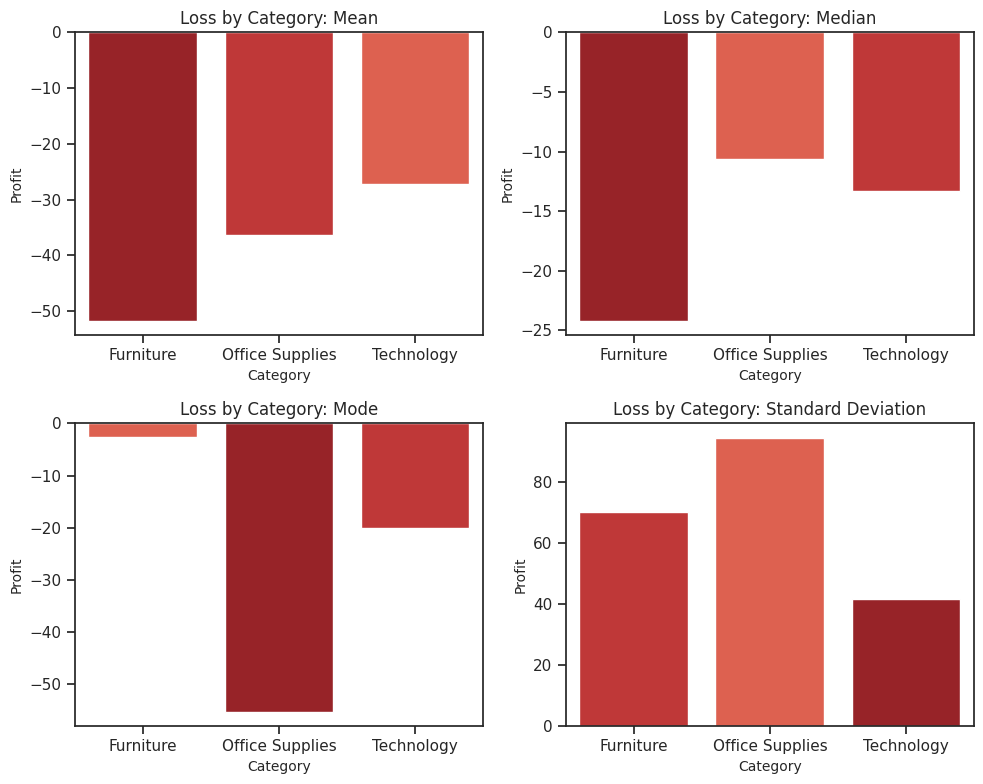

In [ ]:
# Define the summary statistics to plot
summary_stats = ["Mean", "Median", "Mode", "Standard Deviation"]

# Visualize the metrics and save the figure
save_path = "/content/loss_category.png"

# Define a subset of darker blues for cost analysis
loss_palette = sns.color_palette("Reds_r", n_colors=6)[:4]  # Select the darker shades

# Plot for 'Profit'
dvu.plot_summary_stats_grid(
    data=summary_table_category,
    metric='Profit',
    group_by_column='Category',
    stats=summary_stats,
    title_prefix="Loss by Category: ",
    palette=loss_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Category-Level Loss and Cost Analysis


### **Category Highlights**

#### **Furniture**
- **Average Loss:** **-51.76**
  - Losses are driven by high costs, with an average **Estimated Cost** of **$241.10**, the highest across all categories.
  - Furniture shows a relatively low **Profitability Ratio** of **-22.26**, indicating that the high costs are not being offset by sufficient sales.
- **Discounts:** **Moderate**
  - Average discount levels are **0.38**, showing controlled discounting, but not enough to mitigate high costs.
- **Key Focus:**
  - Address operational inefficiencies in the Furniture category by targeting cost reductions, particularly in manufacturing or logistics.

---

#### **Office Supplies**
- **Average Loss:** **-36.32**
  - Losses are amplified by high discounts, with an average **Discount** of **0.64**, the highest among all categories.
  - **Profitability Ratio:** **-45.66**, reflecting that sales are heavily impacted by aggressive discounting.
- **Costs:** **Low**
  - Estimated costs average only **$81.83**, indicating that discounts, not operational inefficiencies, are the primary driver of losses.
- **Key Focus:**
  - Reevaluate discounting strategies in Office Supplies to protect margins, especially for low-cost, high-volume items.

---

#### **Technology**
- **Average Loss:** **-27.24**
  - The lowest average loss among categories, with a **Profitability Ratio** of **-15.57**, indicating relatively better profitability management compared to other categories.
- **Discounts:** **Low**
  - Technology benefits from the lowest average discounts (**0.31**), which helps minimize losses.
- **Costs:** **Moderate**
  - Estimated costs average **$151.70**, suggesting a balanced approach to operational expenses.
- **Key Focus:**
  - Optimize sales growth in Technology through targeted marketing, as cost and discounting strategies appear effective.

---

### **Cross-Category Insights**
1. **Furniture and Office Supplies: High Loss Contributors**
   - These categories have significant losses driven by either high costs (**Furniture**) or excessive discounting (**Office Supplies**).
2. **Technology: Relatively Strong Performance**
   - The Technology category demonstrates better control over costs and discounts, though sales could be increased to further offset losses.
3. **Operational and Pricing Adjustments Needed**
   - A combination of operational cost reductions in Furniture and discount adjustments in Office Supplies could significantly improve overall profitability.

---

### **Recommendations**
1. **Furniture:**
   - Investigate high-cost contributors in the Furniture category, such as supply chain inefficiencies or manufacturing expenses.
2. **Office Supplies:**
   - Reduce reliance on heavy discounting to protect margins. Focus on promoting higher-margin products within this category.
3. **Technology:**
   - Leverage the strong cost and discount position to drive sales growth through enhanced marketing and targeted customer acquisition.






Figure saved as /content/cost_category.png


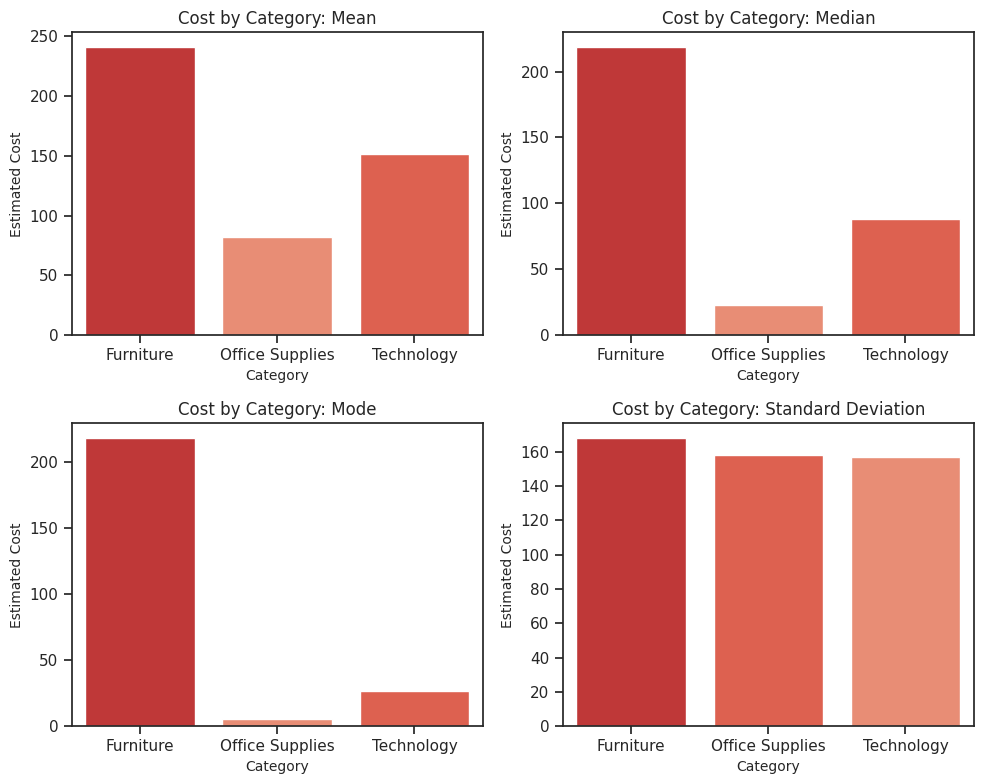

In [ ]:
# Visualize the metrics and save the figure
save_path = "/content/cost_category.png"

# Define a subset of darker blues for cost analysis
cost_palette = sns.color_palette("Reds", n_colors=6)[2:]  # Select the darker shades

# Plot for 'Discount'
dvu.plot_summary_stats_grid(
    data=summary_table_category,
    metric='Estimated Cost',
    group_by_column='Category',
    stats=summary_stats,
    title_prefix="Cost by Category: ",
    palette=cost_palette
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")


# Region, Category, Sub-Category

In [ ]:
# import warnings
# # Suppress warnings
# warnings.filterwarnings("ignore")

# Define metrics for visualization
metrics = [
    'Profit',
    'Profit Margin',
    'Profitability Ratio',
    'Estimated Cost',
    'Sales',
    'Discount',
    'Order Count',
    'Quantity',
    'Regional Market Share (%)'
]

# Define the summary statistics to plot
summary_stats = ['Mean', 'Median', 'Mode', 'Standard Deviation']

# Generate the summary table grouped by Category and Sub-Category
table_subcategory_region = dvu.summarize_metrics_by_group_multi(
    data=df,
    metrics=metrics,
    group_columns=['Region', 'Category', 'Sub-Category']
)

# Sort by Total Profit (ascending for losses)
# Sort by Region, Profit, and Summary_Stats
table_subcategory_region_sorted = table_subcategory_region.sort_values(
    ['Summary_Stats', 'Region', 'Profit'],
    ascending=[True, True, True]
)

# Select the top 5 sub-categories with the largest losses per region
top_losses_by_region = (
    table_subcategory_region_sorted
    .groupby('Region')
    .head(5)
    .reset_index(drop=True)
)

# Display the results
print("\nTop 5 Sub-Categories with Largest Losses per Region:")
top_losses_by_region



Top 5 Sub-Categories with Largest Losses per Region:


,Summary_Stats,Region,Category,Sub-Category,Profit,Profit Margin,Profitability Ratio,Estimated Cost,Sales,Discount,Order Count,Quantity,Regional Market Share (%)
0,Mean,Central,Office Supplies,Appliances,-142.566968,-251.184211,-71.381509,199.079284,56.512316,0.800000,7.605263,3.421053,21.819594
1,Mean,Central,Furniture,Tables,-69.503414,-34.530612,-22.555060,267.529200,198.025786,0.385714,6.785714,2.785714,21.819594
2,Mean,Central,Furniture,Furnishings,-48.675455,-70.253623,-39.807503,101.867861,53.192406,0.600000,7.463768,3.985507,21.819594
3,Mean,Central,Office Supplies,Binders,-35.620348,-161.483051,-61.722618,57.386060,21.765712,0.800000,7.305085,4.237288,21.819594
4,Mean,Central,Furniture,Chairs,-34.418250,-14.714286,-11.951685,280.313550,245.895300,0.300000,6.733333,3.633333,21.819594
5,Mean,East,Technology,Machines,-138.287800,-81.111111,-44.632259,296.397800,158.110000,0.700000,11.333333,4.000000,29.548188
6,Mean,East,Furniture,Bookcases,-86.623864,-43.113636,-26.707720,325.973864,239.350000,0.390909,6.727273,3.545455,29.548188
7,Mean,East,Furniture,Tables,-76.297819,-27.976190,-21.077391,342.641858,266.344038,0.380769,7.230769,2.384615,29.548188
8,Mean,East,Technology,Phones,-40.440274,-23.235294,-18.362788,232.824803,192.384529,0.400000,7.558824,3.411765,29.548188
9,Mean,East,Office Supplies,Supplies,-30.470480,-21.500000,-17.690581,170.360080,139.889600,0.200000,7.000000,2.600000,29.548188


Figure saved as /content/loss_cost_region_category_subcategory.png


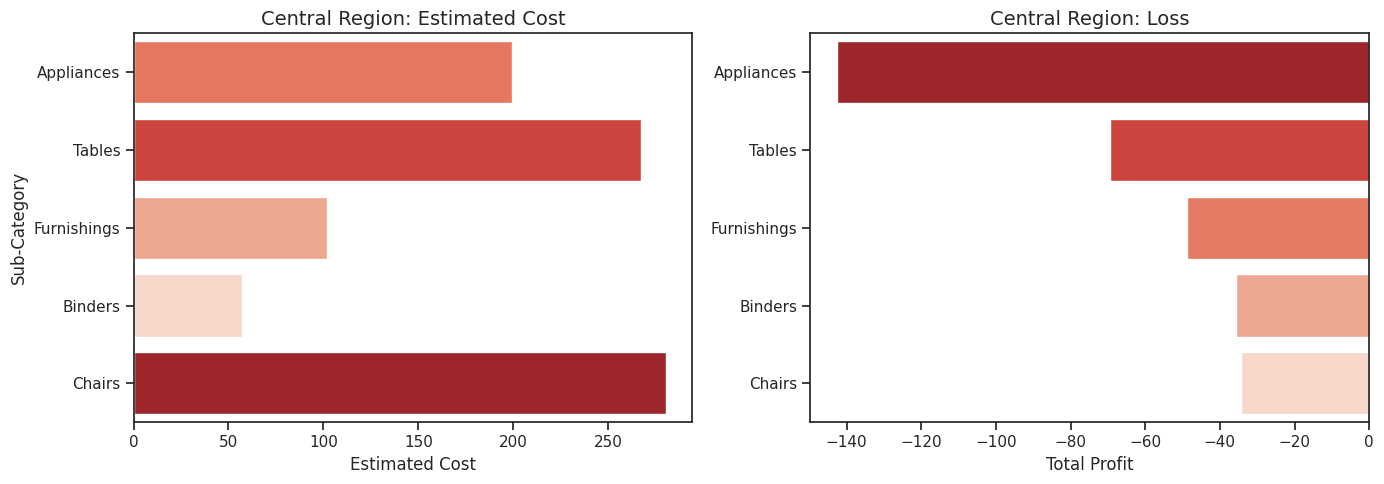

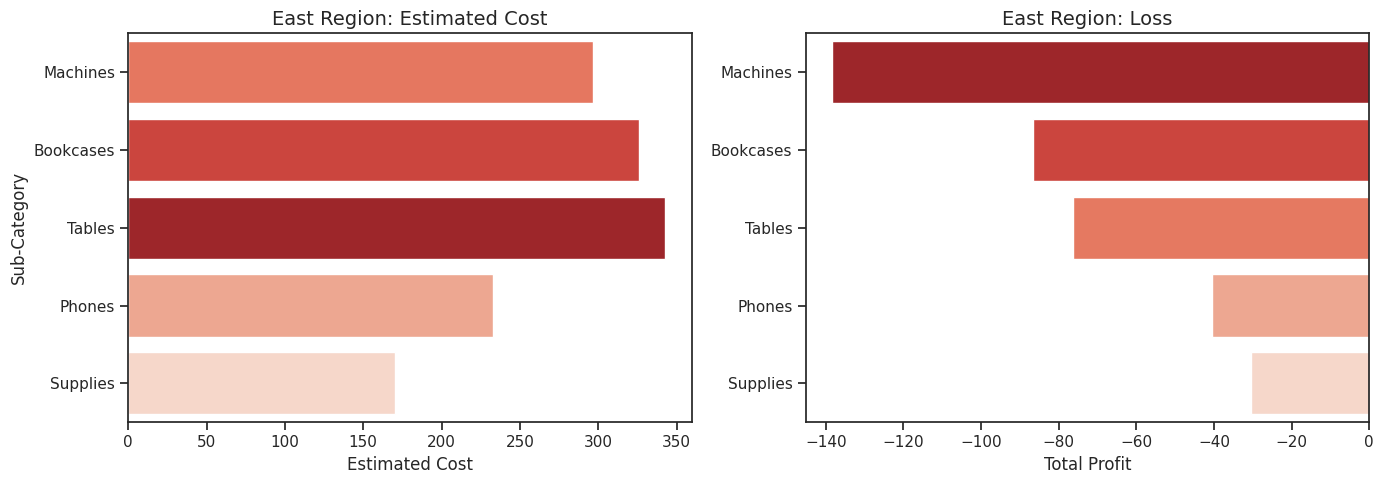

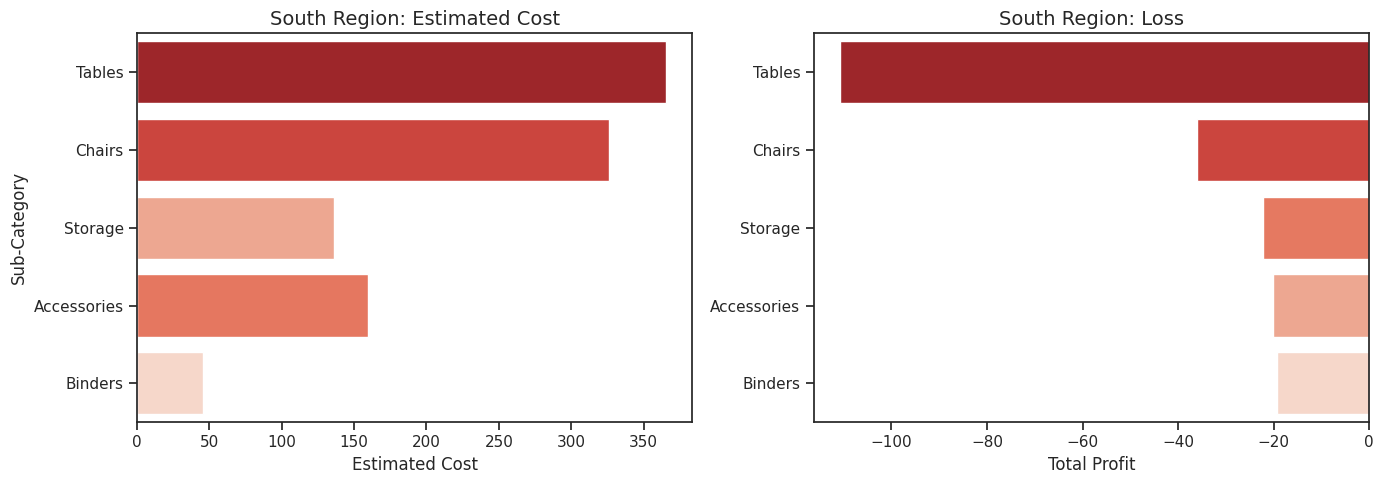

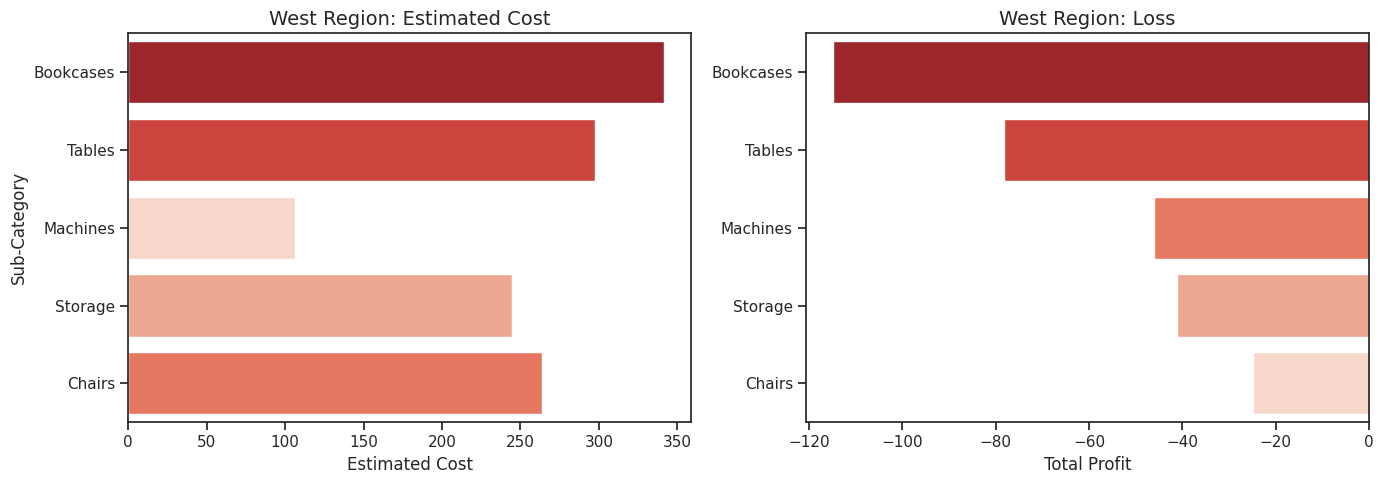

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Define regions and columns for the plot
regions = top_losses_by_region['Region'].unique()
group_by_column = "Sub-Category"
discount_column = "Estimated Cost"
profit_column = "Profit"

# Visualize the metrics and save the figure
save_path = "/content/loss_cost_region_category_subcategory.png"

# Define a darker palette for better visualization
# custom_palette = sns.color_palette("Reds_r", n_colors=7)[-5:]  # Darker reds

# Call the function for all regions
dvu.plot_discount_loss_grid(
    data=top_losses_by_region,
    region_column="Region",
    group_by_column=group_by_column,
    discount_column=discount_column,
    profit_column=profit_column,
    regions=regions,
    figsize=(14, 5)
)

# Save the current figure
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved as {save_path}")

## Region, Category, Sub-Category Analysis


### **Central Region**
1. **Top Loss Driver: Office Supplies - Appliances**
   - **Average Loss:** -142.57
   - **Key Cost:** High estimated costs (**$199.08**) coupled with heavy discounting (**0.8**).
   - **Opportunity:** Focus on operational efficiency and reduce discounts in this sub-category.

2. **Furniture - Tables and Furnishings**
   - **Average Losses:** -69.50 and -48.68 respectively.
   - **Key Issue:** High costs (**\$267.53** for Tables and **$101.87** for Furnishings) are a significant factor.
   - **Opportunity:** Improve supply chain efficiency or consider revising the product lineup.

3. **Office Supplies - Binders**
   - **Average Loss:** -35.62
   - **Key Issue:** Very high discounts (**0.8**) eroding margins.
   - **Opportunity:** Reduce discounts and focus on higher-margin products.

---

### **East Region**
1. **Top Loss Driver: Technology - Machines**
   - **Average Loss:** -138.29
   - **Key Cost:** High estimated costs (**$296.40**) and significant discounts (**0.7**).
   - **Opportunity:** Negotiate better vendor pricing or focus on higher-margin technology products.

2. **Furniture - Bookcases and Tables**
   - **Average Losses:** -86.62 and -76.30 respectively.
   - **Key Issue:** High costs (**\$325.97** and **\$342.64**).
   - **Opportunity:** Streamline supply chain or consider price adjustments.

3. **Technology - Phones**
   - **Average Loss:** -40.44
   - **Key Issue:** Moderate discounts (**0.4**) paired with relatively high costs (**\$232.82**).
   - **Opportunity:** Optimize product pricing and marketing strategies.

---

### **South Region**
1. **Top Loss Driver: Furniture - Tables**
   - **Average Loss:** -110.73
   - **Key Cost:** Very high estimated costs (**$365.40**).
   - **Opportunity:** Investigate operational inefficiencies contributing to these costs.

2. **Office Supplies - Storage and Binders**
   - **Average Losses:** -22.13 and -19.24 respectively.
   - **Key Issue:** Discounts (**0.2** for Storage and **0.7** for Binders) are impacting profitability.
   - **Opportunity:** Align discount strategies with overall profitability goals.

3. **Technology - Accessories**
   - **Average Loss:** -20.03
   - **Key Issue:** Costs are moderate (**$159.34**) but need optimization.
   - **Opportunity:** Focus on increasing sales volume or exploring vendor cost reductions.

---

### **West Region**
1. **Top Loss Driver: Furniture - Bookcases**
   - **Average Loss:** -114.87
   - **Key Cost:** Extremely high estimated costs (**$341.83**).
   - **Opportunity:** Revise product sourcing or consider eliminating low-performing product lines.

2. **Technology - Machines**
   - **Average Loss:** -45.99
   - **Key Cost:** Moderate costs (**$105.99**) with significant discounts (**0.7**).
   - **Opportunity:** Reduce discounts and explore cost-saving measures.

3. **Office Supplies - Storage**
   - **Average Loss:** -41.26
   - **Key Issue:** Costs (**$244.54**) and discounts (**0.2**) are affecting profitability.
   - **Opportunity:** Focus on cost reduction and improved inventory management.

---

### **Strategic Recommendations**
1. **Cost Efficiency:**
   - High costs are a recurring theme in Furniture and Technology categories. Focus on renegotiating vendor contracts and improving supply chain efficiency.

2. **Discount Optimization:**
   - Significant losses in Office Supplies and Technology sub-categories are driven by high discounts. Revise discounting strategies to balance competitive pricing and profitability.

3. **Category-Level Actions:**
   - **Furniture:** Address supply chain inefficiencies driving costs in Tables and Bookcases.
   - **Office Supplies:** Reduce excessive discounting, particularly in Binders and Appliances.
   - **Technology:** Focus on cost control in Machines while optimizing discounts for Accessories and Phones.





#### Data Utils Script

In [1]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Profitability Ratio
    # Avoid division by zero errors by checking non-zero estimated cost
    data['Profitability Ratio'] = data.apply(
        lambda row: (row['Profit'] / row['Estimated Cost']) * 100 if row['Estimated Cost'] != 0 else 0,
        axis=1
    )

    # 4. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 5. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # # Visualize unique value counts
    # palette = sns.color_palette("Pastel2", len(filtered_counts))
    # plt.figure(figsize=(9, 5))
    # filtered_counts.sort_values(ascending=False).plot(
    #     kind='bar',
    #     color=palette,
    #     edgecolor='black'
    # )
    # plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    # plt.xlabel('Columns', fontsize=12)
    # plt.ylabel('Number of Unique Categories', fontsize=12)
    # plt.xticks(rotation=45, ha='right', fontsize=10)
    # plt.grid(axis='y', linestyle='--', alpha=0.3)
    # plt.tight_layout()
    # plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns, observed=True).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data

def detect_outliers_tukey(data, column):
    """
    Detects outliers using Tukey's Fences method for a specified column.

    Parameters:
    - data: DataFrame
        The dataset to analyze.
    - column: str
        The column for which to detect outliers.

    Returns:
    - non_outliers: DataFrame
        Subset of data without outliers.
    - outliers: DataFrame
        Subset of data containing outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    non_outliers = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)]

    return non_outliers, outliers

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.

    Example:
        filtered_data, outliers = remove_outliers_tukey(data, column='Sales', plot=True)

    Notes:
        - This function uses Tukey's Fences (IQR method) to detect and remove outliers.
        - Suitable for continuous numeric data with potential outliers.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Lower Fence: {lower_fence:.2f}, Upper Fence: {upper_fence:.2f}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Plot original data
        if len(data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=data[column], color='darkorange')
            plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

        # Plot filtered data
        if len(filtered_data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=filtered_data[column], color='pink')
            plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

    return filtered_data, outliers


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

#### Data Visualization Script

In [2]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()

def plot_sales_distribution_2(data, column='Sales', title='Distribution Visualizations', color='lightgreen', round_decimals=None):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.
        round_decimals (int, optional): Number of decimal places to round the x-axis values. Default is None.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total value
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of the column
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Dynamic x-axis
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)

    # Automatically format x-axis based on the data range
    x_max = data[column].max()
    x_min = data[column].min()
    x_ticks = plt.MaxNLocator(nbins=6).tick_values(x_min, x_max)

    # Round x-axis values if specified
    if round_decimals is not None:
        x_ticks = [round(tick, round_decimals) for tick in x_ticks]
        axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}" if round_decimals == 0 else f"{x:,.{round_decimals}f}"))

    axes[2].xaxis.set_ticks(x_ticks)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    # plt.show()


# Define a function to calculate summary statistics for a given column
def calculate_discount_stats(data, column='Discount'):
    """
    Calculates summary statistics for a specific column in the given dataset.

    Args:
        data (pd.DataFrame): The dataset to calculate statistics from.
        column (str): The column to calculate statistics for.

    Returns:
        dict: A dictionary of summary statistics.
    """
    stats = {
        'Min': data[column].min(),
        'Max': data[column].max(),
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Standard Deviation': data[column].std()
    }
    return stats

def plot_discount_summary(discount_summary_table, title="Summary Statistics for Discounts"):
    """
    Plots a grouped barplot for discount summary statistics.

    Args:
        discount_summary_table (pd.DataFrame): DataFrame containing summary statistics for discounts.
        title (str): Title for the plot.

    Returns:
        None: Displays the barplot.
    """
    # Melt the DataFrame to long format for easier plotting with Seaborn
    discount_summary_melted = discount_summary_table.melt(
        id_vars='Statistic',
        var_name='Group',
        value_name='Value'
    )

    # Set Seaborn theme
    sns.set_theme(style="whitegrid", context="talk")

    # Create the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=discount_summary_melted,
        x='Statistic',
        y='Value',
        hue='Group',
        palette=['red', 'green']
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Statistic", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_discount_kde(data_losses, data_profits, column='Discount', title='Plot for Costs'):
    """
    Plots overlaying KDE plots for discounts in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the KDE plot.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", linewidth=2)

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)

    # Add legend
    plt.legend(title="Group", fontsize=12, title_fontsize=14)

    # Show the plot
    plt.tight_layout()
    # plt.show()

def plot_discount_boxplot(data_losses, data_profits, column='Discount', title='Boxplot for Costs'):
    """
    Plots side-by-side boxplots for costs in profitable and non-profitable datasets.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        column (str): The column to visualize. Default is 'Discount'.
        title (str): Title for the overall plot.

    Returns:
        None: Displays the boxplot.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Create copies of the data to avoid SettingWithCopyWarning
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Create the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        showfliers=True
    )

    # Add titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel("Group", fontsize=14)
    plt.ylabel(column, fontsize=14)

    # Remove legend for simplicity
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.tight_layout()
    # plt.show()

def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    # plt.show()

def plot_discount_analysis_grid(data_losses, data_profits, summary_table, column='Discount'):
    """
    Creates a grid of plots for discount analysis, including:
    - A barplot of summary statistics
    - A KDE plot of discount distributions
    - A boxplot comparing discounts by profitability.

    Args:
        data_losses (pd.DataFrame): Dataset with losses (Profit < 0).
        data_profits (pd.DataFrame): Dataset with profits (Profit >= 0).
        summary_table (pd.DataFrame): Summary statistics table for discounts.
        column (str): The column to analyze. Default is 'Discount'.

    Returns:
        None: Displays the plots.
    """
    import pandas as pd
    import matplotlib.gridspec as gridspec

    # Create copies to avoid warnings
    data_losses_copy = data_losses.copy()
    data_profits_copy = data_profits.copy()

    # Add group labels
    data_losses_copy['Group'] = 'Losses (Profit < 0)'
    data_profits_copy['Group'] = 'Profits (Profit >= 0)'

    # Combine datasets for boxplot
    combined_data = pd.concat([data_losses_copy, data_profits_copy], ignore_index=True)

    # Set up the grid layout
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2,1], height_ratios=[1, 1], hspace=0.3, wspace=0.2)

    # Plot 1: Summary statistics barplot
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(
        data=summary_table.melt(id_vars=['Statistic'], var_name='Group', value_name='Value'),
        x='Statistic',
        y='Value',
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax1
    )
    ax1.set_title("Summary Statistics for Costs", fontsize=14)
    ax1.set_ylabel("Value", fontsize=12)
    ax1.set_xlabel("Statistic", fontsize=12)
    ax1.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 2: KDE plot
    ax2 = fig.add_subplot(gs[1,0])
    sns.kdeplot(data=data_losses[column], fill=True, color="red", alpha=0.5, label="Losses (Profit < 0)", ax=ax2, linewidth=2)
    sns.kdeplot(data=data_profits[column], fill=True, color="green", alpha=0.5, label="Profits (Profit >= 0)", ax=ax2, linewidth=2)
    ax2.set_title("Cost Distributions", fontsize=14)
    ax2.set_xlabel(column, fontsize=12)
    ax2.set_ylabel("Density", fontsize=12)
    ax2.legend(title="Group", fontsize=10, title_fontsize=12)

    # Plot 3: Boxplot
    ax3 = fig.add_subplot(gs[:,1])
    sns.boxplot(
        data=combined_data,
        x='Group',
        y=column,
        hue='Group',
        palette={"Losses (Profit < 0)": "red", "Profits (Profit >= 0)": "green"},
        ax=ax3,
        showfliers=True
    )
    ax3.set_title("Cost by Profitability", fontsize=14)
    ax3.set_xlabel("Group", fontsize=12)
    ax3.set_ylabel(column, fontsize=12)
    ax3.legend([], [], frameon=False)  # Remove redundant legend

    # Adjust layout and display the grid
    # plt.tight_layout()
    # plt.show()

def plot_metrics_grid(data1, data2=None, metrics=None, group_by_column="", title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for single or multiple datasets with multiple metrics.

    Args:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the x-axis.
        title_prefix (str): Prefix for each plot's title.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    datasets = [data1] if data2 is None else [data1, data2]
    titles = [""] if data2 is None else ["Dataset 1", "Dataset 2"]

    # Determine grid size
    n_cols = 3
    n_rows = -(-len(metrics) * len(datasets) // n_cols)  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, metric in enumerate(metrics or []):
        for j, (data, title_suffix) in enumerate(zip(datasets, titles)):
            idx = i * len(datasets) + j
            if idx < len(axes):
                sns.barplot(
                    data=data.sort_values(by=metric, ascending=False),
                    x=group_by_column,
                    y=metric,
                    hue=metric, palette=palette, legend=False, dodge=False,
                    ax=axes[idx]
                )
                axes[idx].set_title(f"{title_prefix}{metric.replace('_', ' ')} {title_suffix}")
            else:
                axes[idx].axis('off')

    plt.tight_layout()
    # plt.show()


def plot_metrics_grid_2(data1, data2=None, metrics=None, group_by_column="", title1="", title2="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 1x2 grid of barplots for single or multiple datasets with multiple metrics.

    Parameters:
        data1 (pd.DataFrame): Primary dataset.
        data2 (pd.DataFrame, optional): Secondary dataset for comparison. Defaults to None.
        metrics (list): List of column names to plot.
        group_by_column (str): Column to group by on the y-axis.
        title1 (str): Title for the first dataset.
        title2 (str): Title for the second dataset.
        palette (str): Seaborn color palette.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure metrics is not None
    metrics = metrics or []

    # Check if single or dual dataset
    datasets = [data1] if data2 is None else [data1, data2]
    titles = [title1] if data2 is None else [title1, title2]

    for metric in metrics:
        fig, axes = plt.subplots(1, len(datasets), figsize=figsize)

        if len(datasets) == 1:
            axes = [axes]  # Ensure axes is iterable for single plot

        for i, (data, title_suffix, ax) in enumerate(zip(datasets, titles, axes)):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False)

            # Set the category order for the plot
            category_order = data_sorted[group_by_column]

            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by_column,
                hue=metric, palette=palette, legend=False, dodge=False,
                order=category_order,  # Explicitly set the order
                ax=ax
            )
            ax.set_title(f"{title_suffix}: {metric.replace('_', ' ')}", fontsize=14)
            ax.set_xlabel(metric.replace('_', ' '), fontsize=12)
            ax.set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()


def plot_metrics_grid_3(data1, data2=None, discount_column="", loss_column="", group_by_column="", title1="", title2="", palette="Reds_r", figsize=(12, 6)):
    """
    Plots a 1x2 grid of barplots for discounts and losses by subcategories or other groupings.

    Parameters:
        data1 (pd.DataFrame): Primary dataset (e.g., Furniture & Technology).
        data2 (pd.DataFrame, optional): Secondary dataset for comparison (e.g., Office Supplies). Defaults to None.
        discount_column (str): Column name for discounts.
        loss_column (str): Column name for losses.
        group_by_column (str): Column to group by on the y-axis (e.g., Sub-Category).
        title1 (str): Title for the first dataset.
        title2 (str): Title for the second dataset.
        palette (str): Seaborn color palette for the plots.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None: Displays the plots.
    """

    # Check if dual datasets or single dataset
    datasets = [data1] if data2 is None else [data1, data2]
    titles = [title1] if data2 is None else [title1, title2]

    for data, title in zip(datasets, titles):
        # Set up the figure
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # Sort data and reset categories for Discount
        discount_sorted = data.sort_values(by=discount_column, ascending=False)
        discount_sorted[group_by_column] = discount_sorted[group_by_column].astype('object').astype('category')
        discount_sorted[group_by_column] = discount_sorted[group_by_column].cat.reorder_categories(discount_sorted[group_by_column].unique())

        # Sort data and reset categories for Loss
        loss_sorted = data.sort_values(by=loss_column, ascending=True)
        loss_sorted[group_by_column] = loss_sorted[group_by_column].astype('object').astype('category')
        loss_sorted[group_by_column] = loss_sorted[group_by_column].cat.reorder_categories(loss_sorted[group_by_column].unique())

        # Plot Discount
        sns.barplot(
            data=discount_sorted,
            x=discount_column,
            y=group_by_column, order=loss_sorted[group_by_column] ,
            hue=discount_column, palette=palette, legend=False, dodge=False,
            ax=axes[0], ci=None
        )
        axes[0].set_title(f"{title1}: Discounts", fontsize=14)
        axes[0].set_xlabel(discount_column.replace('_', ' '), fontsize=12)
        axes[0].set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # Plot Loss
        sns.barplot(
            data=loss_sorted,
            x=loss_column,
            y=group_by_column, order=loss_sorted[group_by_column] ,
            hue=discount_column, palette=palette, legend=False, dodge=False,
            ax=axes[1], ci=None
        )
        axes[1].set_title(f"{title2}: Losses", fontsize=14)
        axes[1].set_xlabel(loss_column.replace('_', ' '), fontsize=12)
        axes[1].set_ylabel("")  # Remove ylabel to avoid redundancy

        # Adjust layout and show plot
        plt.tight_layout()
        # plt.show()

def plot_metric_grid_single(data, metrics, group_by, title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a 2x2 grid of barplots for a given dataset and multiple metrics.

    Parameters:
    - data: DataFrame
        The dataset to plot (e.g., filtered data by region).
    - metrics: list
        The metrics to plot (e.g., ['Total_Profit', 'Total_Profit_Margin']).
    - group_by: str
        The column to group the data by for plotting (e.g., 'Sub-Category').
    - title_prefix: str
        The prefix for each plot title (e.g., 'Central Region: ').
    - palette: str
        The color palette to use for the barplots.
    - figsize: tuple
        The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Loop through metrics and plot each
    for i, metric in enumerate(metrics):
        if i < len(metrics):
            # Sort data by the current metric
            data_sorted = data.sort_values(by=metric, ascending=False).reset_index(drop=True)

            # Use group_by column values for ordering
            order = data_sorted[group_by].tolist()

            # Plot the barplot
            sns.barplot(
                data=data_sorted,
                x=metric,
                y=group_by,
                palette=palette,
                order=order,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{metric.replace('_', ' ')}", fontsize=14)
            axes[i].set_xlabel(metric.replace('_', ' '), fontsize=12)
            axes[i].set_ylabel(group_by.replace('_', ' '), fontsize=12)
        else:
            # Turn off unused subplots
            axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_filtered_metrics_grid(data, selected_regions, selected_subcategories, metrics, title, palette="Greens", figsize=(20, 16)):
    """
    Plots a grid of barplots for specified metrics filtered by regions and sub-categories.

    Parameters:
    - data: DataFrame
        The dataset containing the metrics and filters.
    - selected_regions: list
        The regions to filter by.
    - selected_subcategories: list
        The sub-categories to filter by.
    - metrics: dict
        A dictionary of metrics with keys as display names and values as column names to plot.
    - title: str
        The title of the entire plot grid.
    - palette: str
        The Seaborn color palette to use for the plots.
    - figsize: tuple
        The size of the figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Filter the data based on selected regions and sub-categories
    filtered_data = data[
        (data['Region'].isin(selected_regions)) &
        (data['Sub-Category'].isin(selected_subcategories))
    ].copy()

    # Convert to categorical for consistent plotting
    filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'], categories=selected_subcategories)
    filtered_data['Region'] = pd.Categorical(filtered_data['Region'], categories=selected_regions)

    # Create a custom palette
    # Define the number of colors needed
    num_colors = len(selected_regions)

    # Select colors from the bolder end of the spectrum
    custom_palette = sns.color_palette("Reds", n_colors=8)[-num_colors:]


    # Set up the grid dimensions
    n_cols = 3  # Number of columns
    n_rows = -(-len(metrics) // n_cols)  # Ceiling division for rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False)

    # Flatten axes for easier iteration
    axes = axes.flatten()

    # Plot each metric
    for (display_name, column_name), ax in zip(metrics.items(), axes):
        sns.barplot(
            data=filtered_data,
            x="Sub-Category",
            y=column_name,
            hue="Region",
            palette=custom_palette,
            edgecolor="black",
            ax=ax
        )
        ax.set_title(display_name, fontsize=12)
        ax.set_xlabel("Sub-Category", fontsize=10)
        ax.set_ylabel(display_name, fontsize=10)
        ax.tick_params(axis="x", rotation=45)

    # Turn off unused axes
    for i in range(len(metrics), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    # plt.show()

def calculate_core_statistics(data, column):
    """
    Calculates core statistics (mean, median, mode, and standard deviation) for a given column in a DataFrame.

    Parameters:
    - data (DataFrame): The dataset containing the column.
    - column (str): The column for which to calculate statistics.

    Returns:
    - dict: A dictionary containing the core statistics.
    """
    mode_value = data[column].mode()
    mode_value = mode_value.iloc[0] if not mode_value.empty else None  # Handle cases with no mode
    core_stats = {
        "Mean": data[column].mean(),
        "Median": data[column].median(),
        "Mode": mode_value,
        "Standard Deviation": data[column].std(),
    }
    return core_stats

def summarize_metrics_by_group(data, metrics, group_column):
    """
    Generates a table of summary statistics for specified metrics grouped by a specified column.

    Parameters:
    - data (DataFrame): The dataset containing the metrics and group column.
    - metrics (list): The list of metric column names to summarize.
    - group_column (str): The column name for the grouping.

    Returns:
    - DataFrame: A summary table with summary statistics for each group.
    """
    # Initialize an empty list to store results
    summary_rows = []

    # Group data by the specified column
    grouped = data.groupby(group_column, observed=True)

    # Iterate over each group and calculate summary statistics for metrics
    for group, group_data in grouped:
        for stat_name, func in {
            "Mean": pd.Series.mean,
            "Median": pd.Series.median,
            "Mode": lambda x: x.mode().iloc[0] if not x.mode().empty else None,
            "Standard Deviation": pd.Series.std,
        }.items():
            # Calculate stats for each metric
            row = {"Summary_Stats": stat_name, group_column: group}
            row.update({metric: func(group_data[metric]) for metric in metrics})
            summary_rows.append(row)

    # Convert the results into a DataFrame
    summary_table = pd.DataFrame(summary_rows)

    return summary_table


def summarize_metrics_by_group_multi(data, metrics, group_columns):
    """
    Generates a table of summary statistics for specified metrics grouped by multiple columns.

    Parameters:
    - data (DataFrame): The dataset containing the metrics and group columns.
    - metrics (list): The list of metric column names to summarize.
    - group_columns (list): The column names for grouping.

    Returns:
    - DataFrame: A summary table with summary statistics for each group.
    """
    # Initialize an empty list to store results
    summary_rows = []

    # Group data by the specified columns
    grouped = data.groupby(group_columns, observed=True)

    # Iterate over each group and calculate summary statistics for metrics
    for group, group_data in grouped:
        for stat_name, func in {
            "Mean": pd.Series.mean,
            "Median": pd.Series.median,
            "Mode": lambda x: x.mode().iloc[0] if not x.mode().empty else None,
            "Standard Deviation": pd.Series.std,
        }.items():
            # Calculate stats for each metric
            row = {"Summary_Stats": stat_name}
            row.update(dict(zip(group_columns, group if isinstance(group, tuple) else [group])))
            row.update({metric: func(group_data[metric]) for metric in metrics})
            summary_rows.append(row)

    # Convert the results into a DataFrame
    summary_table = pd.DataFrame(summary_rows)

    return summary_table


# def plot_summary_stats_grid(data, metric, group_by_column, stats, title_prefix="", palette="Greens_d", figsize=(10,8)):
#     """
#     Plots a 2x2 grid of barplots for a single metric grouped by a specified column,
#     with each plot showing a different summary statistic.

#     Parameters:
#     - data (DataFrame): The dataset containing the metric and group-by column.
#     - metric (str): The metric to plot (e.g., 'Discount').
#     - group_by_column (str): The column to group by on the x-axis (e.g., 'Order Year').
#     - stats (list): A list of summary statistics to plot (e.g., ['Mean', 'Median', 'Mode', 'Standard Deviation']).
#     - title_prefix (str): A prefix for the plot titles (e.g., 'Discount: ').
#     - palette (str): The Seaborn color palette to use for the plots.
#     - figsize (tuple): The size of the entire figure (width, height).

#     Returns:
#     - None: Displays the plots.
#     """
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     # Set up a 2x2 grid
#     n_rows, n_cols = 2, 2
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
#     axes = axes.flatten()

#     # Plot each summary statistic
#     for i, stat in enumerate(stats):
#         if i < len(stats):
#             sns.barplot(
#                 data=data,
#                 x=group_by_column,
#                 y=metric,
#                 hue=metric,
#                 palette=palette,
#                 ax=axes[i], legend=False,
#                 dodge=False
#             )
#             axes[i].set_title(f"{title_prefix}{stat}", fontsize=12)
#             axes[i].set_xlabel(group_by_column.replace('_', ' '), fontsize=10)
#             axes[i].set_ylabel(metric.replace('_', ' '), fontsize=10)
#         else:
#             axes[i].axis('off')  # Turn off unused subplots

#     # Adjust layout
#     plt.tight_layout()
#     plt.show()

def plot_summary_stats_grid(data, metric, group_by_column, stats, title_prefix="", palette="Greens_d", figsize=(10, 8)):
    """
    Plots a 2x2 grid of barplots for a single metric grouped by a specified column,
    with each plot showing a different summary statistic.

    Parameters:
    - data (DataFrame): The dataset containing the metric and group-by column.
    - metric (str): The metric to plot (e.g., 'Discount').
    - group_by_column (str): The column to group by on the x-axis (e.g., 'Order Year').
    - stats (list): A list of summary statistics to plot (e.g., ['Mean', 'Median', 'Mode', 'Standard Deviation']).
    - title_prefix (str): A prefix for the plot titles (e.g., 'Discount: ').
    - palette (str): The Seaborn color palette to use for the plots.
    - figsize (tuple): The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set up a 2x2 grid
    n_rows, n_cols = 2, 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Plot each summary statistic
    for i, stat in enumerate(stats):
        if i < len(stats):
            sns.barplot(
                data=data[data['Summary_Stats'] == stat],  # Filter for the current stat
                x=group_by_column,
                y=metric,
                hue=metric, palette=palette, legend=False, dodge=False,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{stat}", fontsize=12)
            axes[i].set_xlabel(group_by_column.replace('_', ' '), fontsize=10)
            axes[i].set_ylabel(metric.replace('_', ' '), fontsize=10)
        else:
            axes[i].axis('off')  # Turn off unused subplots

    # Adjust layout
    plt.tight_layout()
    # plt.show()


def plot_discount_loss_grid(data, region_column, group_by_column, discount_column, profit_column, regions, figsize=(14, 6)):
    """
    Plots discount and profit side by side for each region in a 1x2 grid.

    Parameters:
        data (pd.DataFrame): Dataset to plot.
        region_column (str): Column name for regions.
        group_by_column (str): Column to group by (e.g., 'Sub-Category').
        discount_column (str): Column name for discount data.
        profit_column (str): Column name for profit data.
        regions (list): List of regions to plot.
        palette (str): Seaborn palette for the plots.
        figsize (tuple): Figure size for the plots.

    Returns:
        None: Displays the plots.
    """
    for region in regions:
        # Filter data for the current region
        region_data = data[data[region_column] == region].copy()

        # Ensure the group_by_column is categorical and ordered
        region_data[group_by_column] = region_data[group_by_column].astype('category')
        region_data[group_by_column] = region_data[group_by_column].cat.set_categories(region_data[group_by_column].unique(), ordered=True)

        # Set up the grid for side-by-side plots
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        custome_palette = sns.color_palette("Reds", n_colors=5)[-5:]
        custome_palette_2 = sns.color_palette("Reds_r", n_colors=5)[0:]

        # Plot discount
        sns.barplot(
            data=region_data,
            x=discount_column,
            y=group_by_column,
            hue=region_data[discount_column], palette=custome_palette, order=region_data[group_by_column].unique(),
            legend=False, dodge=False,
            ax=axes[0]
        )
        axes[0].set_title(f"{region} Region: {discount_column}", fontsize=14)
        axes[0].set_xlabel(f"{discount_column}", fontsize=12)
        axes[0].set_ylabel(group_by_column.replace('_', ' '), fontsize=12)

        # custome_palette_2 = sns.color_palette("Reds", n_colors=5)[:5]

        # Plot profit
        sns.barplot(
            data=region_data,
            x=profit_column,
            y=group_by_column,
            hue=region_data[profit_column], palette=custome_palette_2, order=region_data[group_by_column].unique(),
            legend=False, dodge=False,
            ax=axes[1]
        )
        axes[1].set_title(f"{region} Region: Loss", fontsize=14)
        axes[1].set_xlabel("Total Profit", fontsize=12)
        axes[1].set_ylabel("")  # No need for y-axis label on the second plot

        # Adjust layout
        plt.tight_layout()
        # plt.show()

def reset_categories(data, category_columns):
    """
    Resets the categories for the specified columns in the DataFrame.
    Converts columns to object and back to category to include only existing categories.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - category_columns (list): List of column names to reset categories for.

    Returns:
    - pd.DataFrame: The updated DataFrame with reset categories.
    """
    updated_data = data.copy()  # Avoid modifying the original DataFrame
    for column in category_columns:
        if column in updated_data.columns:
            updated_data.loc[:, column] = updated_data[column].astype('object').astype('category')
    return updated_data

def plot_metric_pair_grid_profit_discount(data, metric1, metric2, category, group_by, title_prefix="", palette="Reds_d", figsize=(12, 6)):
    """
    Plots a 1x2 grid with two metrics side by side for comparison, assuming the data is pre-sorted.

    Parameters:
    - data: DataFrame
        The dataset to plot.
    - metric1: str
        The first metric to plot (e.g., 'Total_Profit').
    - metric2: str
        The second metric to plot (e.g., 'Total_Discount').
    - group_by: str
        The column to group the data by for plotting (e.g., 'Sub-Category').
    - title_prefix: str
        The prefix for each plot title.
    - palette: str
        The color palette to use for both metrics.
    - figsize: tuple
        The size of the entire figure (width, height).

    Returns:
    - None: Displays the plots.
    """
    # Select colors from the palette
    custom_palette1 = sns.color_palette(palette, n_colors=len(data))[::-1]  # Darkest for largest losses
    custom_palette2 = sns.color_palette(palette, n_colors=len(data))  # Lightest for smallest discounts

    # Set up a 1x2 grid
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Plot the first metric (e.g., Total_Profit)
    sns.barplot(
        data=data,
        x=metric1,
        y=group_by,
        order=data[group_by],  # Use the pre-sorted order
        hue=metric1,
        palette=custom_palette1,
        legend=False,
        dodge=False,
        ax=axes[0]
    )
    axes[0].set_title(f"{title_prefix}{metric1.replace('_', ' ')} for {category}", fontsize=14)
    axes[0].set_xlabel(metric1.replace('_', ' '), fontsize=12)
    axes[0].set_ylabel(group_by.replace('_', ' '), fontsize=12)

    # Plot the second metric (e.g., Total_Discount)
    sns.barplot(
        data=data,
        x=metric2,
        y=group_by,
        order=data[group_by],  # Use the same order as the first plot
        hue=metric2,
        palette=custom_palette2,
        legend=False,
        dodge=False,
        ax=axes[1]
    )
    axes[1].set_title(f"{title_prefix}{metric2.replace('_', ' ')} for {category}", fontsize=14)
    axes[1].set_xlabel(metric2.replace('_', ' '), fontsize=12)
    axes[1].set_ylabel("")  # No need for y-axis label on the second plot

    # Adjust layout and show plot
    plt.tight_layout()
    # plt.show()

'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>